### Student Information
Name: Samuel Dharma Sukatja

Student ID: 110006223

GitHub ID: 127833575

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [732]:
### Begin Assignment Here

# 2. Same process from the DM2024-Lab1-Master 

In [733]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import helpers.data_mining_helpers as dmh

## Load Dataset 

Here, since the dataset from the hugging face has already transformed file, we can directly use it 

In [734]:
# Load the dataset
X = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
# X = X.sample(frac=1, random_state=42).reset_index(drop=True)
print(X.head())
print("-----------------------------------------------------------------")
print(X.info())
print("------------------------1-----------------------------------------")
print(X['sentiment'].value_counts()) 

       sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4      nostalgia  listening to his songs reminds me of my mum wh...
-----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  1500 non-null   object
 1   comment    1500 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB
None
------------------------1-----------------------------------------
sentiment
not nostalgia    750
nostalgia        750
Name: count, dtype: int64


In [735]:
# Insert 'sentiment_binary' column right after the 'sentiment' column
X.insert(loc=X.columns.get_loc('sentiment') + 1, column='sentiment_num', value=X['sentiment'].apply(lambda x: 0 if x == 'nostalgia' else 1))

In [736]:
X

sentiment  sentiment_num  \
0     not nostalgia              1   
1         nostalgia              0   
2         nostalgia              0   
3     not nostalgia              1   
4         nostalgia              0   
...             ...            ...   
1495  not nostalgia              1   
1496  not nostalgia              1   
1497  not nostalgia              1   
1498      nostalgia              0   
1499      nostalgia              0   

                                                comment  
0     He was a singer with a golden voice that I lov...  
1     The mist beautiful voice ever I listened to hi...  
2     I have most of Mr. Reeves songs.  Always love ...  
3     30 day leave from 1st tour in Viet Nam to conv...  
4     listening to his songs reminds me of my mum wh...  
...                                                 ...  
1495  i don't know!..but the opening of the video,.....  
1496  it's sad this is such a beautiful song when yo...  
1497  Dear Friend, I think age and time is not that ...  
1498  I was born in 1954 and started to be aware of ...  
1499  This is the first CD I bought after my marriag...  

[1500 rows x 3 columns]

## 4. Data Mining using Pandas

### 4.1 Missing Values

In [737]:
# check missing values
X.isnull()

sentiment  sentiment_num  comment
0         False          False    False
1         False          False    False
2         False          False    False
3         False          False    False
4         False          False    False
...         ...            ...      ...
1495      False          False    False
1496      False          False    False
1497      False          False    False
1498      False          False    False
1499      False          False    False

[1500 rows x 3 columns]

In [738]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                       sentiment_num  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                              comment  
0  The amoung of missing records is:   
1                                   0

In [739]:
# calculate the missing values in every record instead of every column
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

### 4.2 Dealing with Duplicate Data

In [740]:
# Find duplicate rows
duplicates = X.duplicated(keep = False) # keep=False marks all duplicates as True
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [741]:
# Count the number of duplicate rows
sum(X.duplicated())

1

In [742]:
# Print duplicate rows
print("Duplicate rows:")
X[duplicates]

Duplicate rows:


sentiment  sentiment_num  \
62  not nostalgia              1   
78  not nostalgia              1   

                                              comment  
62  never heard this song before... WOW What an am...  
78  never heard this song before... WOW What an am...

In [743]:
# Find duplicate comments
duplicates = X.duplicated(subset='comment', keep=False)  # keep=False marks all duplicates as True

# Print the duplicated rows based on the 'comment' column
duplicated_rows = X[duplicates]
print("Duplicated comments:")
duplicated_rows

Duplicated comments:


sentiment  sentiment_num  \
62  not nostalgia              1   
78  not nostalgia              1   

                                              comment  
62  never heard this song before... WOW What an am...  
78  never heard this song before... WOW What an am...

In [744]:
X.drop_duplicates(inplace=True)

In [745]:
# Count the number of duplicate rows
sum(X.duplicated())

0

## 5. Data Preprocessing

### 5.1 Sampling

In [746]:
X_sample = X.sample(n=750) #random state

In [747]:
len(X_sample)

750

In [748]:
X_sample[0:4]

sentiment  sentiment_num  \
740   not nostalgia              1   
762       nostalgia              0   
1213      nostalgia              0   
1366      nostalgia              0   

                                                comment  
740   does anyone know the name of an actress in thi...  
762                                 Bring back the time  
1213  Remind me of when I am 7 years old listening t...  
1366  Timeless song. One of my favorites . Brings ba...

Let's do something cool here while we are working with sampling! Let us look at the distribution of sentiment in both the sample and original dataset. Let us visualize and analyze the disparity between the two datasets. To generate some visualizations, we are going to use matplotlib python library. With matplotlib, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes and when using Jupyter notebooks. Let's take a loot at the magic of matplotlib below.



sentiment
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

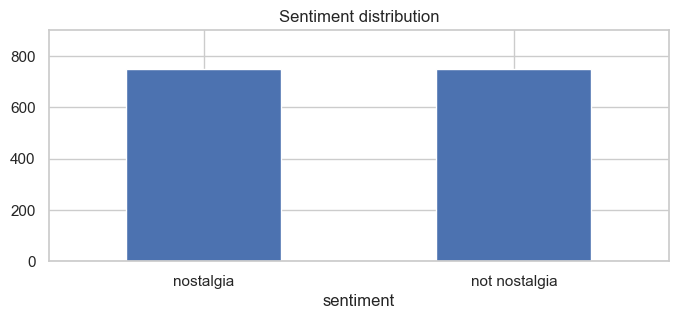

In [749]:
# Calculate the upper bound for the y-axis of the bar chart
# by finding the maximum count of sentiment values and increasing it by 20%
upper_bound = max(X.sentiment.value_counts() * 1.2)

# Print the count of each sentiment value in the dataset
print(X.sentiment.value_counts())

# Plot a bar chart to visualize the distribution of sentiments in the dataset
X.sentiment.value_counts().plot(
    kind='bar',                  
    title='Sentiment distribution', 
    ylim=[0, upper_bound],      
    rot=0,                      
    fontsize=11,                
    figsize=(8, 3)            
)


sentiment
nostalgia        385
not nostalgia    365
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

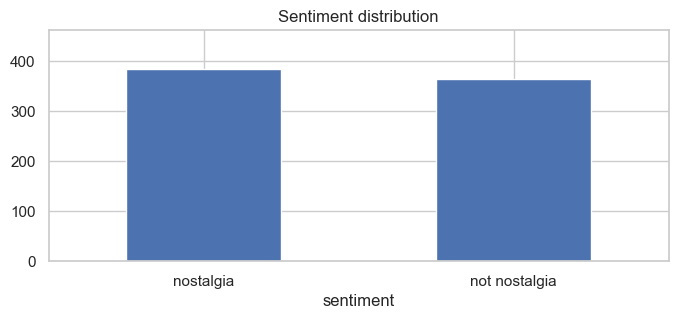

In [750]:
# Calculate the upper bound for the y-axis of the bar chart
# by finding the maximum count of sentiment values and increasing it by 20%
upper_bound = max(X_sample.sentiment.value_counts() * 1.2)

# Print the count of each sentiment value in the dataset
print(X_sample.sentiment.value_counts())

# Plot a bar chart to visualize the distribution of sentiments in the dataset
X_sample.sentiment.value_counts().plot(
    kind='bar',                  
    title='Sentiment distribution',  
    ylim=[0, upper_bound],      
    rot=0,                       
    fontsize=11,                
    figsize=(8, 3)              
)


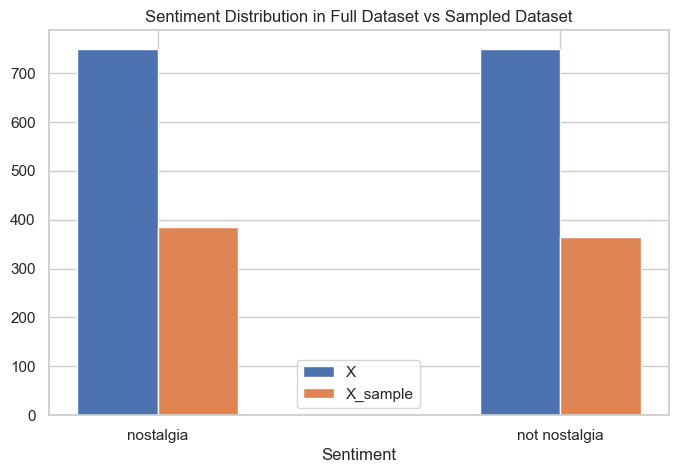

In [751]:
sentiment = ["nostalgia", "not nostalgia"]
X_counts = X.sentiment.value_counts()
X_sample_counts = X_sample.sentiment.value_counts()

n_sentiment = len(X_counts)
bar_width = 0.2
index = np.arange(n_sentiment)

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))

bars1 = ax.bar(index, X_counts, bar_width, label='X')
bars2 = ax.bar(index + bar_width, X_sample_counts, bar_width, label='X_sample')

ax.set_xlabel('Sentiment')
ax.set_title('Sentiment Distribution in Full Dataset vs Sampled Dataset')
ax.set_xticks(index + bar_width / 2)  
ax.set_xticklabels(sentiment, rotation=0)  
ax.legend()

# Show the plot
plt.show()


### 5.2 Feature Creation
We will practice feature creation, which involves generating new, useful features from our original dataset to capture important information. In our `X` table, we aim to create features from the `comment` field but need to identify what specific features to develop. This process, known as `feature engineering`, often begins by considering problems to solve or questions to answer.

To enhance our dataset, we will extract unigrams (individual words) from each text and add them as a new feature in the pandas DataFrame. This will help us analyze word distribution and frequency.

Before coding, we'll introduce the NLTK library, a useful tool for natural language processing and text mining tasks. Specifically, we will use NLTK for tokenization, which splits sentences into their components, such as words and emojis. Let’s get started by importing the NLTK library!

In [752]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\Samuel
[nltk_data]     Sukatja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Samuel
[nltk_data]     Sukatja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [753]:
# Tokenize the text in the 'comment' column of the DataFrame X
# and create a new column 'unigrams' to store the tokenized words
# Note: This operation may take a minute or two to process
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [754]:
X[0:4]["unigrams"]# Display the first four entries in the 'unigrams' column

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [755]:
X[0:4] # Display the first four rows of the DataFrame X

sentiment  sentiment_num  \
0  not nostalgia              1   
1      nostalgia              0   
2      nostalgia              0   
3  not nostalgia              1   

                                             comment  \
0  He was a singer with a golden voice that I lov...   
1  The mist beautiful voice ever I listened to hi...   
2  I have most of Mr. Reeves songs.  Always love ...   
3  30 day leave from 1st tour in Viet Nam to conv...   

                                            unigrams  
0  [He, was, a, singer, with, a, golden, voice, t...  
1  [The, mist, beautiful, voice, ever, I, listene...  
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [756]:
list(X[0:1]['unigrams']) # Convert the first entry in the 'unigrams' column to a list

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

### 5.3 Feature subset selection

In [757]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


Now we can  also see some examples of what each feature is based on their index in the vector:

In [758]:
print(count_vect.get_feature_names_out()[2847])
print(count_vect.get_feature_names_out()[1846])
print(count_vect.get_feature_names_out()[3261])
print(count_vect.get_feature_names_out()[983])

search
jones
tell
discover


The two lines of code transformed the articles into a term-document matrix by tokenizing each article with a default tokenizer and generating a word frequency vector for each document. While we can create custom analyzers or use the NLTK analyzer, we'll stick with the default analyzer provided by CountVectorizer for simplicity. Let’s take a closer look at this analyzer.



In [759]:
analyze = count_vect.build_analyzer()

In [760]:
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [761]:
# We can check the shape of this matrix by:
X_counts.shape

(1499, 3730)

In [762]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [763]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [764]:
count_vect.get_feature_names_out()[62]

'1st'

As we can see the result is just this huge sparse matrix, which is computationally intensive to generate and difficult to visualize. But we can see that the fourth record, specifically, contains a 1 in the 63 element, which from our feature names we can deduce that this article contains exactly one '1st' term.

The 1 at the 63 element of the 4th record represents the '1st' term. Notice that there is another 1 in the same record. Now we provide code that can verify what word this 1 represents from the vocabulary. 

In [765]:
# Get the feature names and convert the sparse matrix to a dense array
X_dense = X_counts[0:5, 0:100].toarray()

# Specify the document index to analyze (3 in this case)
doc_index = 3

# Retrieve the feature names from the CountVectorizer
feature_names = count_vect.get_feature_names_out()

# Find the indices of non-zero elements (features) for the specified document
non_zero_indices = np.nonzero(X_dense[doc_index])[0]

# Extract the features and their counts for the specified document
features_in_doc = feature_names[non_zero_indices]
counts_in_doc = X_dense[doc_index][non_zero_indices]

for index, feature, count in zip(non_zero_indices, features_in_doc, counts_in_doc):
    print(f"Feature {index}: {feature}, Count: {count}")


Feature 62: 1st, Count: 1
Feature 90: 2nd, Count: 1
Feature 91: 30, Count: 1


In [766]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [767]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [768]:
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

For the heat map, we are going to use another visualization library called seaborn. It's built on top of matplotlib and closely integrated with pandas data structures. One of the biggest advantages of seaborn is that its default aesthetics are much more visually appealing than matplotlib. 

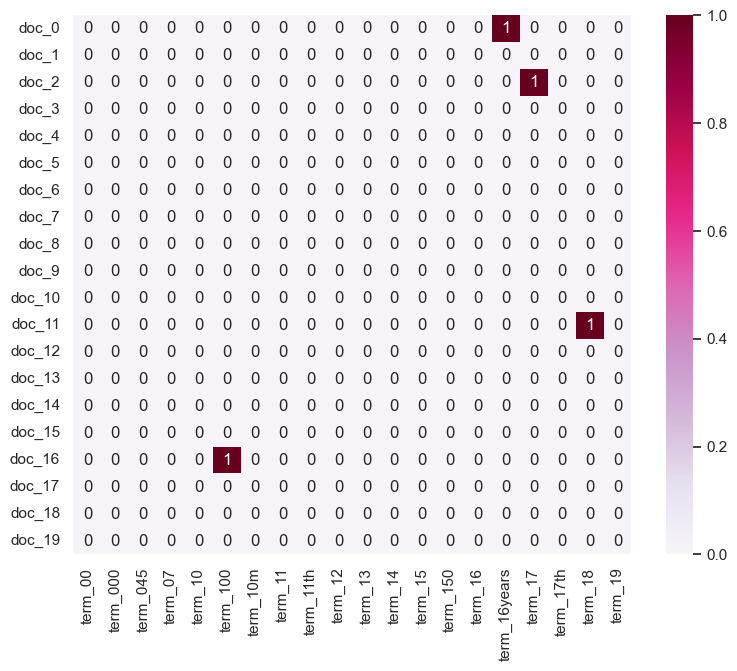

In [769]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

The chart above illustrates the sparsity of the term-document matrix, showing only one term with a frequency of 1 in the selected document. We chose 20 articles and 20 terms for the histogram. As an exercise, we try modifying the code to plot the entire term-document matrix or a sample of it. 

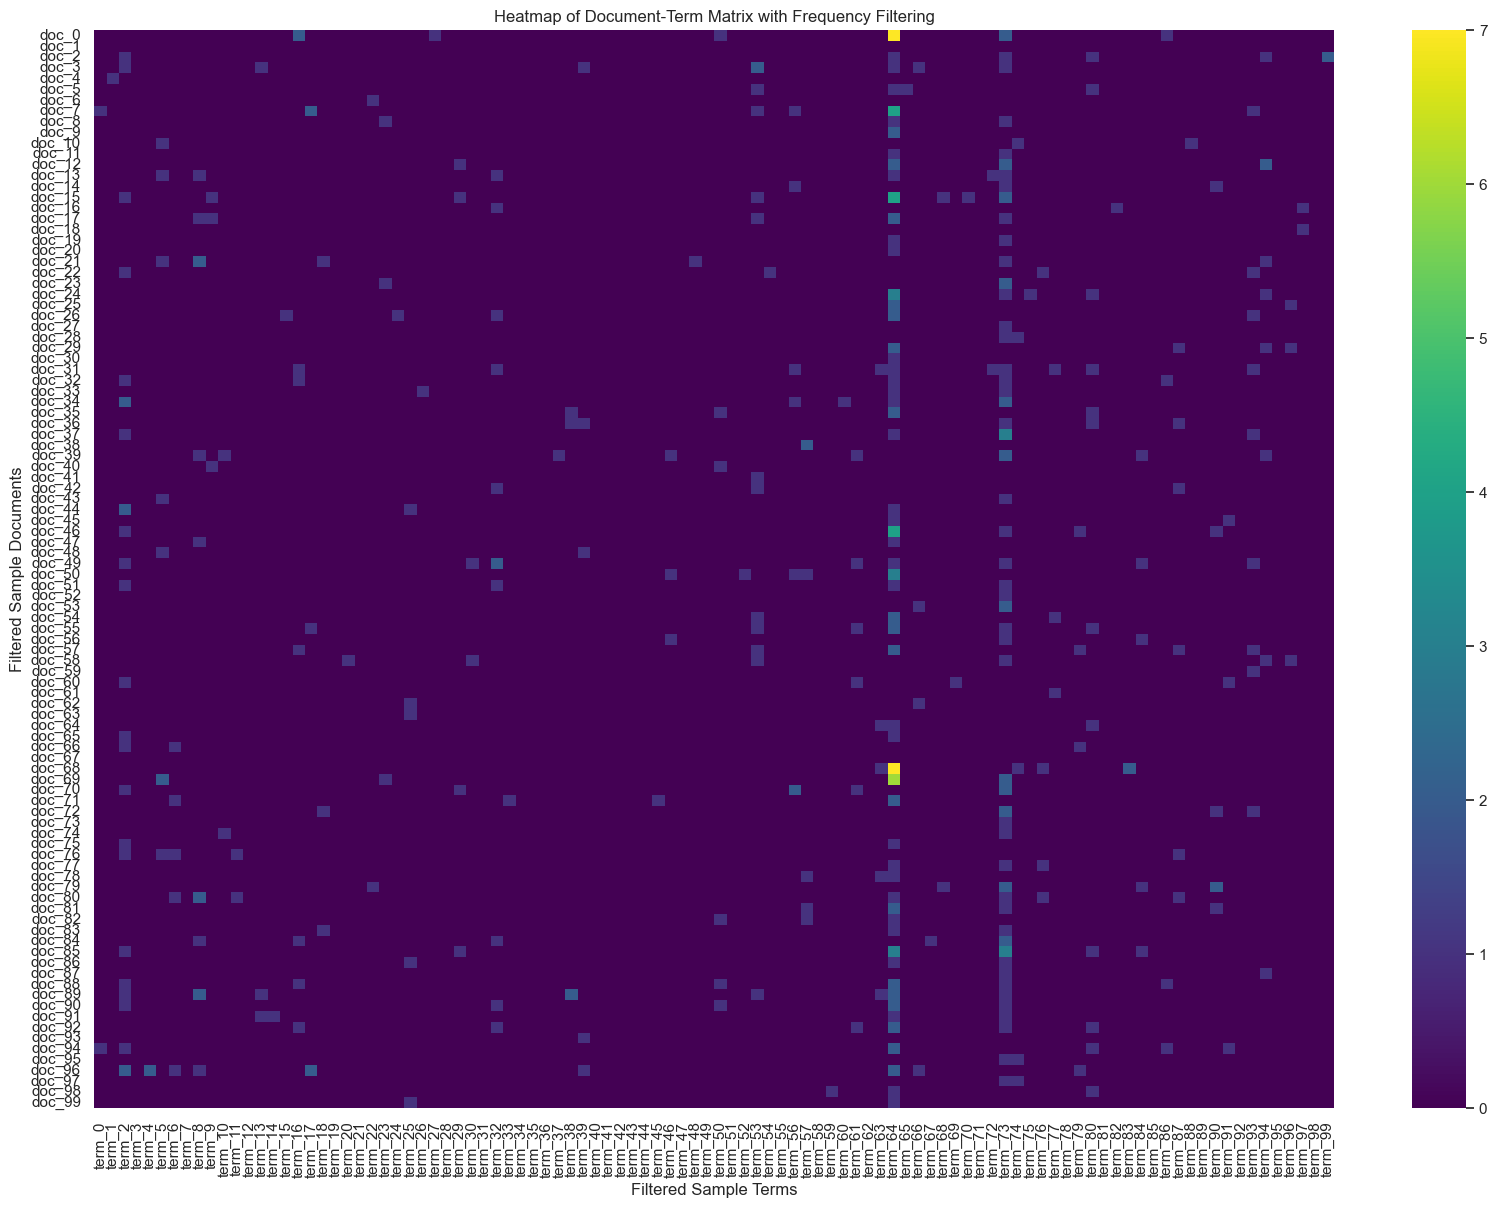

In [770]:
import random
random.seed(42)

# Sample selection using frequency filtering
doc_frequency_threshold = 5
term_frequency_threshold = 10

# Filter rows and columns by minimum frequency
doc_frequencies = (X_counts > 0).sum(axis=1)
term_frequencies = (X_counts > 0).sum(axis=0)

sample_docs = [i for i in range(X_counts.shape[0]) if doc_frequencies[i, 0] >= doc_frequency_threshold]
sample_terms = [i for i in range(X_counts.shape[1]) if term_frequencies[0, i] >= term_frequency_threshold]

# Limit to 100 samples if above threshold
sample_docs = random.sample(sample_docs, min(100, len(sample_docs)))
sample_terms = random.sample(sample_terms, min(100, len(sample_terms)))

# Generate the heatmap data
plot_z = X_counts[sample_docs, :][:, sample_terms].toarray()
plot_x = ["term_" + str(i) for i in range(len(sample_terms))]
plot_y = ["doc_" + str(i) for i in range(len(sample_docs))]

# Plot sparse heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(plot_z, cmap='viridis', cbar=True, xticklabels=plot_x, yticklabels=plot_y)

# Add labels and title
plt.xlabel('Filtered Sample Terms')
plt.ylabel('Filtered Sample Documents')
plt.title('Heatmap of Document-Term Matrix with Frequency Filtering')
plt.show()


### Explanation:

Here I use random sampling, because when dealing with large data (e.g., thousands of documents and tens of thousands of terms), visualizing the entire dataset will be overwhelming and not informative.  
Here, I used `random.sample` to select 100 documents and 100 terms. Note that I also use threshold of doc_frequency and term_frequency

The heatmap is generated using seaborn which provides a good representation of the data.

### 5.4 Attribute Transformation / Aggregation

In [771]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

# for j in range(0,10): # First 10th terms
#     term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

In [772]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [773]:
term_frequencies[0] #sum of first term: 00

1

C:\Users\Samuel Sukatja\AppData\Local\Temp\ipykernel_4480\3480579971.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



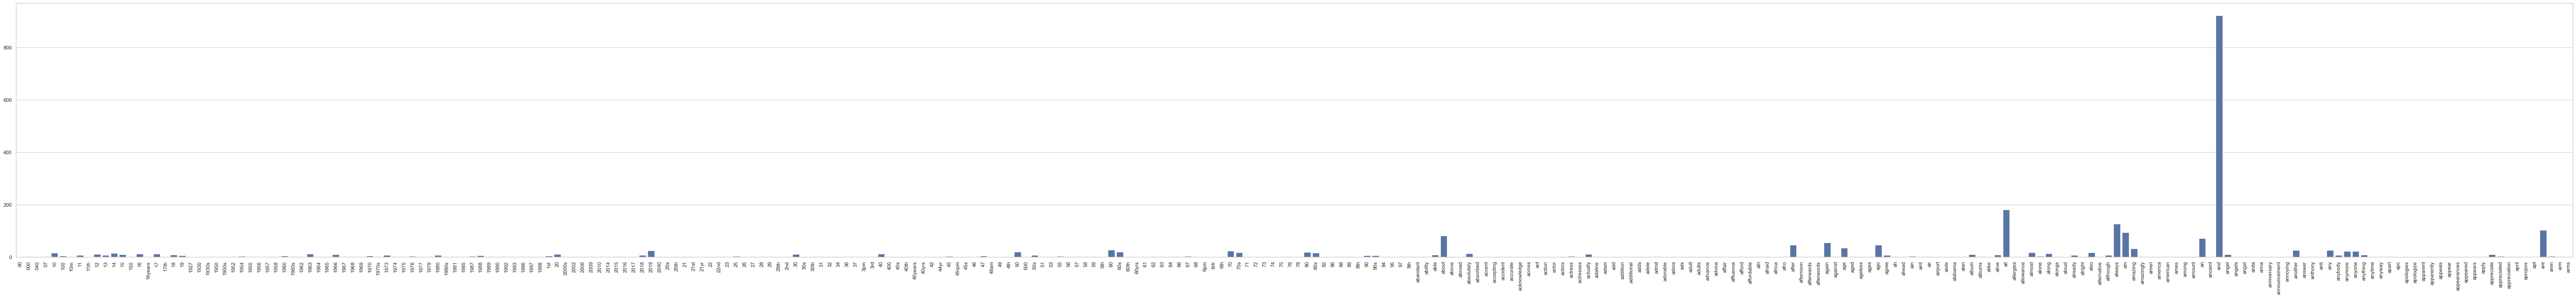

In [774]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

To make a nicer iteractive visualization, here we can use plotly

In [775]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

In [776]:
# Answer here
terms = count_vect.get_feature_names_out()[:300]  
frequencies = term_frequencies[:300]  
term_freq_df = pd.DataFrame({'Term': terms, 'Frequency': frequencies})

fig = px.bar(term_freq_df, 
             x='Term', 
             y='Frequency')

fig.update_layout(xaxis_tickangle=-45) 
fig.show()

The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. To reduce computational load, 
 we can visualize only the top 50 terms, focusing on the most frequent terms among the first 300.

In [777]:
# Select the top N terms by frequency for efficient visualization
top_n = 50  
top_terms_df = term_freq_df[:50]  # Select the first 50 terms from the term-frequency DataFrame

# Create a bar chart for the top terms
fig = px.bar(top_terms_df, 
             x='Term', 
             y='Frequency', 
             title=f'Top {top_n} Term Frequencies From the First 300 Terms',
             labels={'Term': 'Terms', 'Frequency': 'Frequency'},
             hover_data=['Term', 'Frequency'])

# Customize layout for readability
fig.update_layout(xaxis_tickangle=-45)  
fig.show()


Additionally, we can attempt to sort the terms on the x-axis by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and we  will be able to observe the so called long tail.

In [778]:
# Answer here
term_freq_df = term_freq_df.sort_values(by='Frequency', ascending=False)

fig = px.bar(term_freq_df,
             x='Term',
             y='Frequency',
             title='Term Frequencies Sorted by Frequency',
             labels={'Term': 'Terms', 'Frequency': 'Frequency'},
             hover_data=['Term', 'Frequency'])


fig.update_layout(xaxis_tickangle=-45) 
fig.show()

Since we have term frequencies, we can apply a log transformation to these values for better visualization. By importing Python’s math library and applying it to the term frequency array, we can scale frequencies, making their distribution easier to interpret. This is a common example of attribute transformation. Let’s give it a try!

In [779]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

C:\Users\Samuel Sukatja\AppData\Local\Temp\ipykernel_4480\2166548998.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



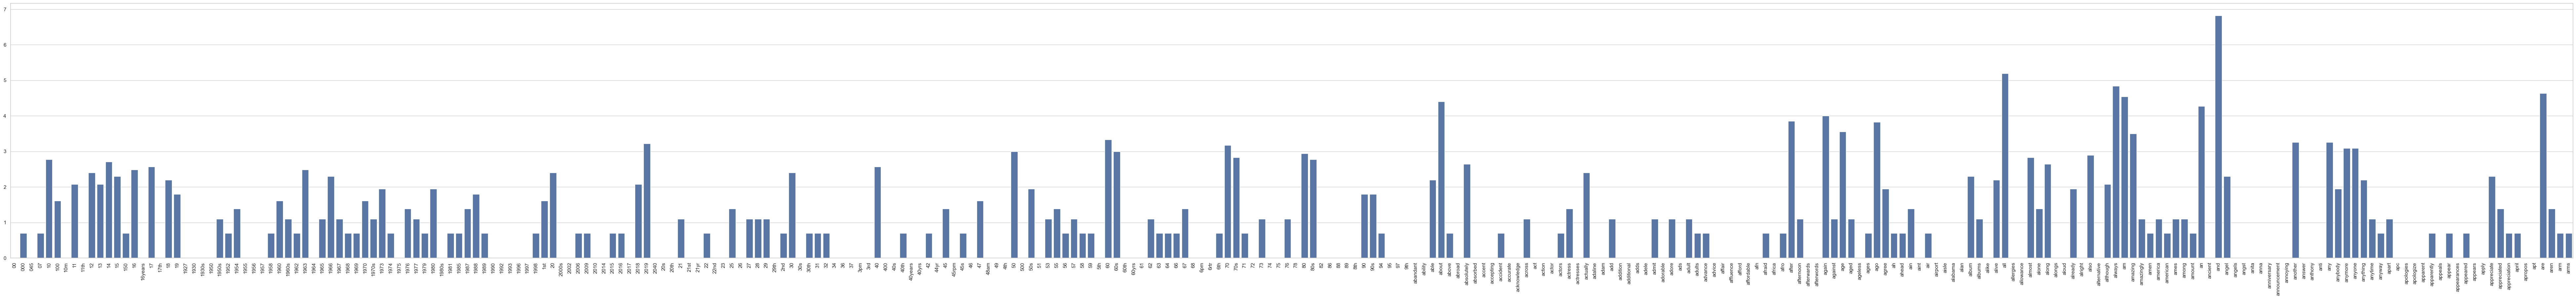

In [780]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [781]:
terms = count_vect.get_feature_names_out()[:300]  
frequencies = term_frequencies_log[:300]  
term_freq_df = pd.DataFrame({'Term': terms, 'Frequency': frequencies})

fig = px.bar(term_freq_df, 
             x='Term', 
             y='Frequency')

fig.update_layout(xaxis_tickangle=-45) 
fig.show()



In [782]:
top_n = 50  
top_terms_df = term_freq_df[:50]

fig = px.bar(top_terms_df, 
             x='Term', 
             y='Frequency', 
             title=f'Top {top_n} Term Frequencies Log From the First 300 Terms',
             labels={'Term': 'Terms', 'Frequency': 'Frequency'},
             hover_data=['Term', 'Frequency'])

# Customize layout
fig.update_layout(xaxis_tickangle=-45)  
fig.show()

In [783]:

term_freq_df = term_freq_df.sort_values(by='Frequency', ascending=False)

fig = px.bar(term_freq_df,
             x='Term',
             y='Frequency',
             title='Term Frequencies Log Sorted by Frequency',
             labels={'Term': 'Terms', 'Frequency': 'Frequency'},
             hover_data=['Term', 'Frequency'])


fig.update_layout(xaxis_tickangle=-45) 
fig.show()

#### Observations
The log transformation compresses the y-axis making it easier to observe terms that have very high frequencies. In a regular frequency plot, terms with high counts might dominate the scale, hiding the variation among less frequent terms. The log scale makes both high and low-frequency terms to be visible clearly.

In addition, the log transformation highlighted the relative differences among frequencies effectively. For example, if one term has a frequency of 100 and another has 200 the raw/original values maybe show a flat difference but the log values would visualizes this difference more meaningfully.

Therefore, by observing the log-transformed values, we can better identify the "long tail" phenomenon.

So, this method of visualization can help in tasks like feature selection or determining which terms to prioritize for further analysis 


###  Finding frequent patterns
Now, we will see how to get extra insight from our document-term matrix, we will do this by mining frequent patterns. For this we will be using the PAMI library that we previously installed.

In [784]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
sentiments = X['sentiment'].unique()  # Get unique sentiment labels
sentiment_dfs = {}  # Dictionary to store DataFrames for each sentiment

for sentiment in sentiments:
    # Filter the original DataFrame by sentiment
    sentiment_dfs[sentiment] = X[X['sentiment'] == sentiment].copy()

# Function to create term-document frequency DataFrame for each sentiment
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the comment data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each sentiment
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each sentiment

for sentiment in sentiments:
    filt_term_document_dfs[sentiment] = create_term_document_df(sentiment_dfs[sentiment])

In [785]:
# Display the filtered DataFrame for one of the sentiments, feel free to change the number in the vector
sentiment_number=0 #You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiments[sentiment_number]}:")
filt_term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Sentiment not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   
748   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
744     0         0      0        0    0    0        0      0  
745     0         0      0        0    0    0        0      0  
746     0         0      0        0    0    0        0      0  
747     1         0      0        0    0    0        0      0  
748     0         0      0        0    0    0        0      0  

[749 rows x 2602 columns]

In [786]:
# Display the filtered DataFrame for one of the sentiments, feel free to change the number in the vector
sentiment_number=1 #You can change it from 0 to 1
print(f"Filtered Term-Document Frequency DataFrame for Sentiment {sentiments[sentiment_number]}:")
filt_term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for Sentiment nostalgia:


07  10  11  11th  12  13  14  15  16  17  ...  young  younger  youngster  \
0     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
1     0   0   0     0   0   0   0   0   0   1  ...      0        0          0   
2     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
3     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
4     0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...        ...   
745   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
746   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
747   0   0   0     0   0   1   0   0   0   0  ...      0        0          0   
748   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   
749   0   0   0     0   0   0   0   0   0   0  ...      0        0          0   

     your  yours  youth  youthful  youtube  yrs  yup  
0       0      0      0         0        0    0    0  
1       0      0      0         0        0    0    0  
2       0      0      0         0        0    0    0  
3       1      0      0         0        0    0    0  
4       0      0      0         0        0    0    0  
..    ...    ...    ...       ...      ...  ...  ...  
745     0      0      0         0        0    0    1  
746     0      0      0         0        0    0    0  
747     0      0      0         0        0    0    0  
748     0      0      0         0        0    0    0  
749     0      0      0         0        0    0    0  

[750 rows x 2295 columns]

In the past sections we saw the behaviour of each word frequency in the documents, but we still want to generalize a little bit more so we can observe and determine the data that we are going to use to mine the patterns. For this we will group the terms in bins and we are going to plot their frequency. Again, feel free to change the category number to explore the different results.

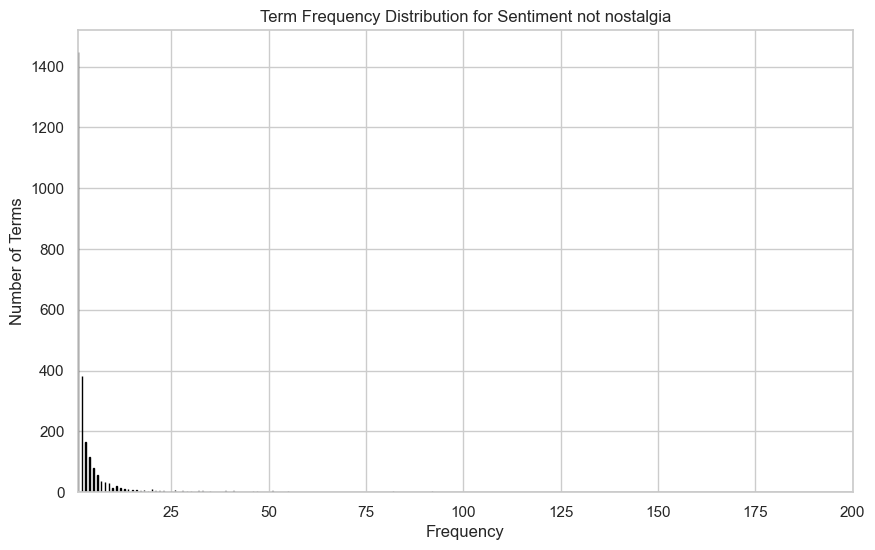

In [787]:
 # Sum over all documents to get total frequency for each word
sentiment_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Sentiment {sentiments[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

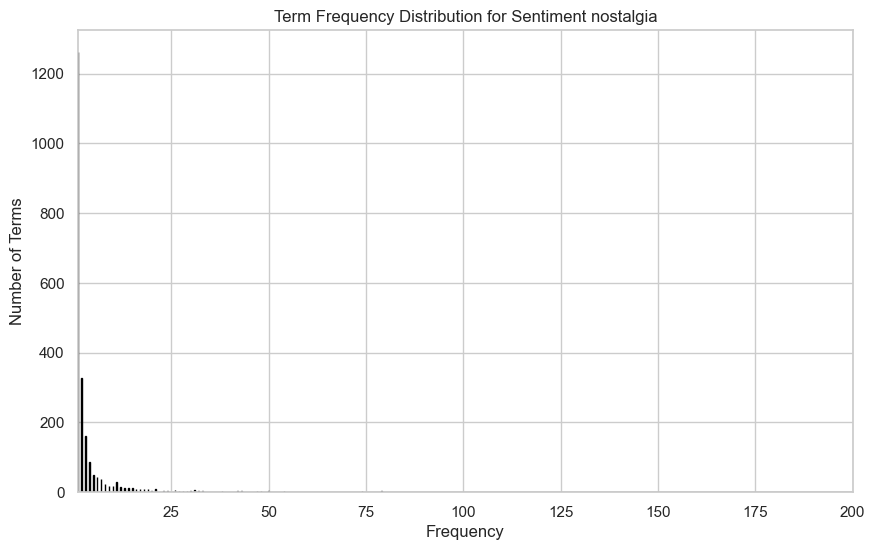

In [788]:
 # Sum over all documents to get total frequency for each word
sentiment_number=1 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Sentiment {sentiments[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

This graph shows that most words appear infrequently, while a few are very common. For pattern recognition, we focus on word combinations that help classify documents, excluding rare and overly common words (like "the," "in," etc.). To improve the results, we will filter out the bottom 1% and top 5% of word frequencies to target more informative terms.

The choice of top 5% and bottom 1% is arbitrary, and other applications may adjust this based on domain knowledge. 

#### Top 5% & Bottom 1% 

In [789]:
sentiment_number=0 #You can change it from 0 to 1
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[sentiment_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {sentiments[sentiment_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'this', 'and', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'on', 'what', 'not', 'be', 'can', 'me', 'voice', 'just', 'as', 'beautiful', 'songs', 'her', 'time', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'never', 'much', 'about', 'who', 'really', 'if', 'we', 'more', 'best', 'ever', 'by', 'thank', 'think', 'would', 'only', 'how', 'don', 'still', 'has', 'very', 'there', 'am', 'out', 'him', 'these', 'could', 'up', 'old', 'hear', 'do', 'listen', 'an', 'singer', 'had', 'many', 'here', 'such', 'version', 'too', 'today', 'been', 'most', 'get', 'your', 'people', 'world', 'heard', 'man', 'video', 'some', 'sing', 'listening', 'real', 'years', 'were', 'than', 'singing', 'heart', 'nice', 'their', 'better', 'life', 'day', 'its', 'then', 'way', 'sad', 'those',

In [790]:
sorted_counts #We can see the frequencies sorted in a descending order

array([708, 452, 451, ...,   1,   1,   1], dtype=int64)

In [791]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([2276, 2290,  160, ..., 1509, 1510,    0], dtype=int64)

In [792]:
filt_term_document_dfs[sentiments[sentiment_number]].loc[:,'the'].sum(axis=0) #Here

708

In [793]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[sentiments[sentiment_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {sentiments[sentiment_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['00', 'montgomery', 'money', 'monday', 'moments', 'mocking', 'mock', 'mitch', 'misunderstood', 'minute', 'minds', 'miller', 'monumental', 'millennium', 'miles', 'microphone', 'miami', 'meta', 'mess', 'merle', 'mendes', 'mended', 'melting', 'melt', 'melodica', 'milestone']


In [794]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([  1,   1,   1, ..., 451, 452, 708], dtype=int64)

In [795]:
sorted_indices #This are the indices corresponding to the words after being sorted

array([   0, 1510, 1509, ...,  160, 2290, 2276], dtype=int64)

In [796]:

filt_term_document_dfs[sentiments[sentiment_number]].loc[:,'milestone'].sum(axis=0) #Here we can sum up the column corresponding to the bottom 1% words, we just specify which one first.

1

Now that we have seen what type of words are inside the thresholds we set, then we can procede to **filter them out of the dataframe**. 

In [797]:
sentiment_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for sentiment in sentiments:
    print(f'\nFor sentiment {sentiment} we filter the following words:')
    term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(filt_term_document_dfs[sentiment])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {sentiments[sentiment_number]}:")
term_document_dfs[sentiments[sentiment_number]]


For sentiment not nostalgia we filter the following words:
Bottom 1.0% words: 
00               1
montgomery       1
money            1
monday           1
moments          1
mocking          1
mock             1
mitch            1
misunderstood    1
minute           1
minds            1
miller           1
monumental       1
millennium       1
miles            1
microphone       1
miami            1
meta             1
mess             1
merle            1
mendes           1
mended           1
melting          1
melt             1
melodica         1
milestone        1
dtype: int64
Top 5.0% words: 
got         23
amazing     23
first       23
wish        24
any         25
          ... 
of         361
to         394
and        451
this       452
the        708
Length: 130, dtype: int64

For sentiment nostalgia we filter the following words:
Bottom 1.0% words: 
yup            1
gospel         1
rose           1
round          1
rousing        1
goodness       1
routine        1
row       

000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0      0    0   0    0    0   0   0   0   0    0  ...        0         0   
1      0    0   0    0    0   0   0   0   0    0  ...        0         0   
2      0    0   0    0    0   0   0   0   0    0  ...        0         0   
3      0    0   0    0    0   0   0   0   0    0  ...        0         0   
4      0    0   0    0    0   0   0   0   0    0  ...        0         0   
..   ...  ...  ..  ...  ...  ..  ..  ..  ..  ...  ...      ...       ...   
744    0    0   0    0    0   0   0   0   0    0  ...        0         0   
745    0    0   0    0    0   0   0   0   0    0  ...        0         0   
746    0    0   0    0    0   0   0   0   0    0  ...        0         0   
747    0    0   0    0    0   0   0   0   0    0  ...        0         0   
748    0    0   0    0    0   0   0   0   0    0  ...        0         0   

     youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0             0         0      0        0    0    0        0      0  
1             0         0      0        0    0    0        0      0  
2             0         0      0        0    0    0        0      0  
3             0         0      0        0    0    0        0      0  
4             0         0      0        0    0    0        0      0  
..          ...       ...    ...      ...  ...  ...      ...    ...  
744           0         0      0        0    0    0        0      0  
745           0         0      0        0    0    0        0      0  
746           0         0      0        0    0    0        0      0  
747           0         0      0        0    0    0        0      0  
748           0         0      0        0    0    0        0      0  

[749 rows x 2446 columns]

Now, review the words that were filtered in each sentiment and we'll see the differences and similarities

In [798]:
def extract_filtered_words(categories, term_document_dfs, top_percent=0.05, bottom_percent=0.01):
    filtered_words_data = []  
    
    for category in categories:
        word_sums = term_document_dfs[category].sum(axis=0)
        sorted_words = word_sums.sort_values()
        
        total_words = len(sorted_words)
        top_n = int(top_percent * total_words)
        bottom_n = int(bottom_percent * total_words)
        
        bottom_words = sorted_words.head(bottom_n)
        top_words = sorted_words.tail(top_n)
        
        # Store bottom words and their frequencies
        for word, freq in bottom_words.items():
            filtered_words_data.append({'Word': word, 'Frequency': freq, 'Sentiment': category, 'Type': 'Bottom'})

        # Store top words and their frequencies
        for word, freq in top_words.items():
            filtered_words_data.append({'Word': word, 'Frequency': freq, 'Sentiment': category, 'Type': 'Top'})
    
    filtered_words_df = pd.DataFrame(filtered_words_data)
    
    return filtered_words_df


filtered_words_df = extract_filtered_words(sentiments, filt_term_document_dfs)
filtered_words_df 




Word  Frequency      Sentiment    Type
0            00          1  not nostalgia  Bottom
1    montgomery          1  not nostalgia  Bottom
2         money          1  not nostalgia  Bottom
3        monday          1  not nostalgia  Bottom
4       moments          1  not nostalgia  Bottom
..          ...        ...            ...     ...
287         and        472      nostalgia     Top
288          to        543      nostalgia     Top
289        this        545      nostalgia     Top
290          my        566      nostalgia     Top
291         the        643      nostalgia     Top

[292 rows x 4 columns]

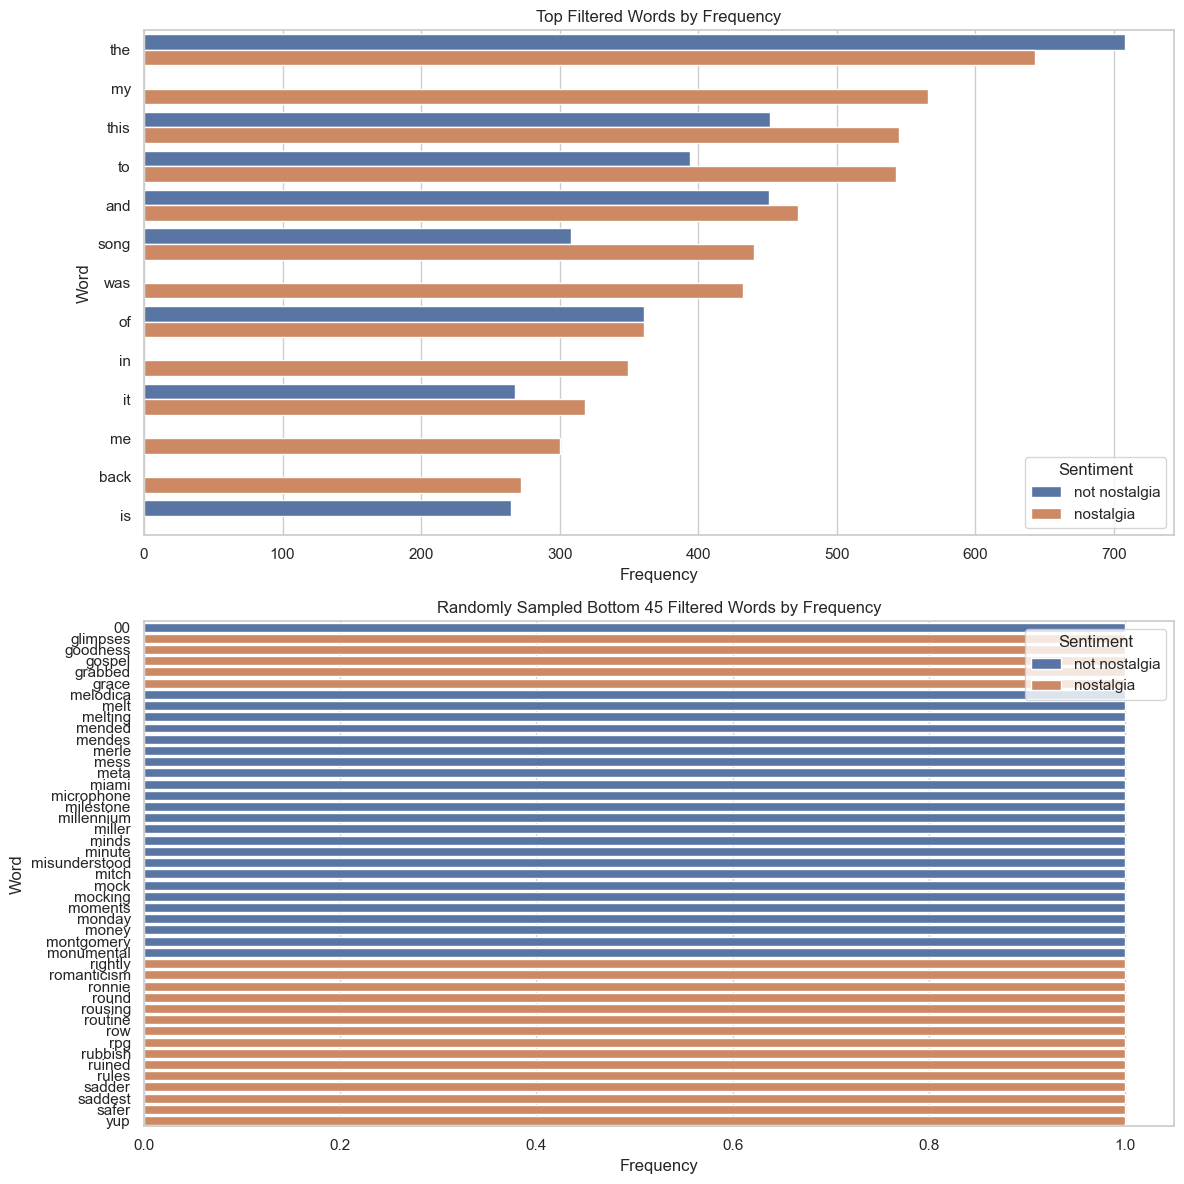

<Figure size 640x480 with 0 Axes>

In [799]:
def plot_filtered_words_bar(filtered_words_df):
  
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))
    
    # Plot Top words
    top_words_df = filtered_words_df[filtered_words_df['Type'] == 'Top']
    top_words_to_plot = top_words_df.groupby(['Word', 'Sentiment']).sum().reset_index()
    
    # Sort by Frequency
    top_words_to_plot = top_words_to_plot.sort_values(by='Frequency', ascending=False).head(20)  # Change number of words to display
    sns.barplot(x='Frequency', y='Word', hue='Sentiment', data=top_words_to_plot, ax=axes[0])
    axes[0].set_title('Top Filtered Words by Frequency')
    
    # Plot Bottom words
    num_bottom_words = 45
    bottom_words_df = filtered_words_df[filtered_words_df['Type'] == 'Bottom']
    bottom_words_sample = bottom_words_df.sample(n=num_bottom_words, random_state=42)  # Random sample of bottom words
    
    bottom_words_to_plot = bottom_words_sample.groupby(['Word', 'Sentiment']).sum().reset_index()

    sns.barplot(x='Frequency', y='Word', hue='Sentiment', data=bottom_words_to_plot, ax=axes[1])
    axes[1].set_title(f'Randomly Sampled Bottom {num_bottom_words} Filtered Words by Frequency')
    
    plt.tight_layout()
    plt.show()
    
    plt.tight_layout()
    plt.show()


plot_filtered_words_bar(filtered_words_df)

#### Reviews and Comments:
1. Similarities:
- **Presence of Stopwords**: Words like "the," "and," "to," and "this" are present in the top 5% of both sentiment categories. These are typical stop words that often appear in large quantities across most text data and provide little insight into sentiment.
- **Uncommon Words**: Each sentiment has a set of words in the bottom 1% that are used very infrequently. These are words that appear only once across all documents in each sentiment category, meaning they are too rare to contribute meaningfully to pattern recognition. 

2. Differences:
- **Relevance of Top Words**: In "nostalgia," rare words like "grace," "romanticism," and "grabbed" could hint a specific memories or emotions. For "not nostalgia," rare words such as "monday," "milestone," and "money" seem more factual or objective, with less of an emotional attachment.

Great! Now that our document-term frequency dataframe is ready, we can proceed with the frequent pattern mining process. To do this, we first need to convert our dataframe into a transactional database that the PAMI library can work with. We will generate a CSV file for each category to create this database.


In [800]:
from PAMI.extras.DF2DB import DenseFormatDF as db      #Uncomment this line and comment the line below if this block of code 
                                                        #gives you trouble
# from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    sentiment_safe = sentiment.replace(' ', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[sentiment]) #Uncomment this line and comment the line below if this block of code 
                                                         #gives you trouble
    # obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.410738255033557
Maximum Transaction Size : 46
Standard Deviation Transaction Size : 5.926429722323316
Variance in Transaction Sizes : 35.16977700801039
Sparsity : 0.9965614316210002


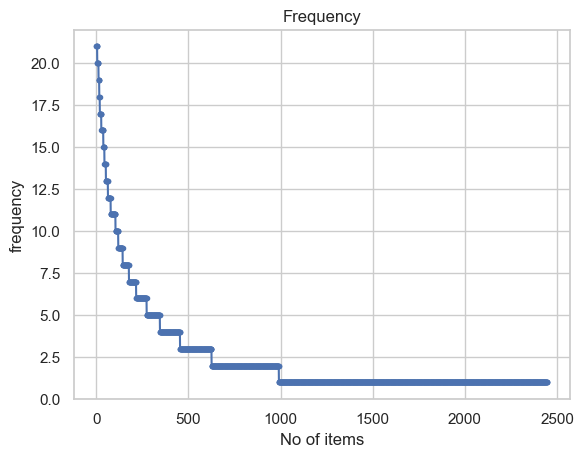

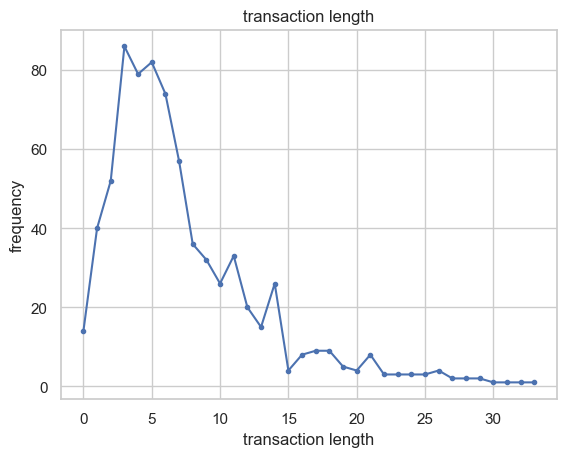

In [801]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.693460490463215
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.213372063492091
Variance in Transaction Sizes : 52.103722524357735
Sparsity : 0.9959733855996001


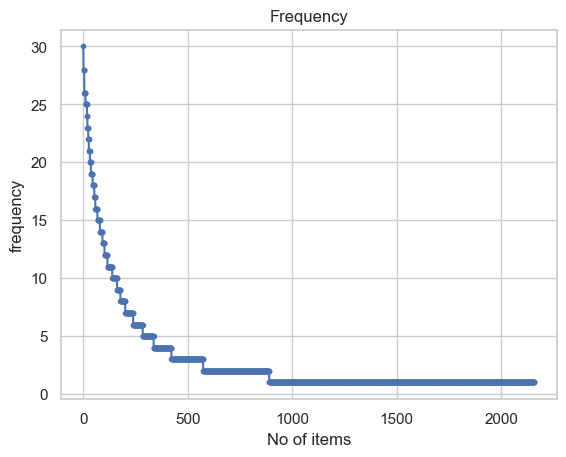

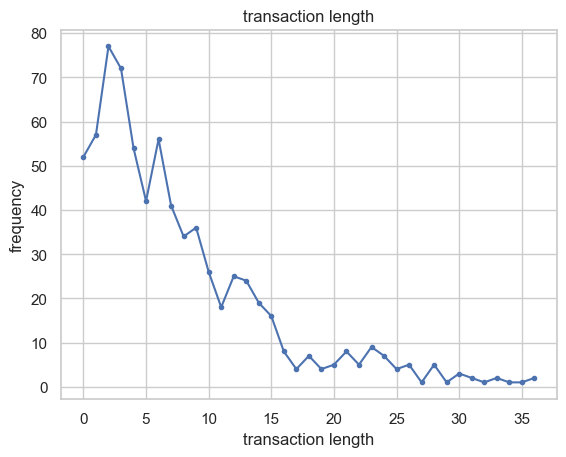

In [802]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

### Graph Interpretation (nostalgia and not nostalgia)
1. Item Frequency Distribution (First Graph):
This graph plots the frequency of items (words) against their rank (position based on how frequently they appear).

    **X-axis (No of items)**: Represents the items (words) in the dataset. The items are ranked in decreasing order of their frequency.

   **Y-axis (Frequency)**: Indicates how many times each word appears in the dataset across all transactions (documents).

    We can see that the graph shows a steep drop in frequency as we move from the most frequent items to the least frequent ones. A few items (words) appear in a large number of transactions, while most items (around 2000) have very low frequencies. 


3. Transaction Length Distribution (Second Graph):
This graph plots the frequency of transaction lengths, the number of items (words) per transaction (document).

    **X-axis (Transaction Length)**: Represents the number of items (words) in each transaction (document).

   **Y-axis (Frequency)**: Indicates how many transactions have a particular length.

    We can see that the transaction length distribution shows that most transactions (documents) are relatively short, containing between 1 and 10 items.The frequency of transactions decreases as the transaction length increases, with only a small number of documents containing more than 20 words.

Why are these stats important? It is because we are going to use the FPGrowth algorithm from PAMI, and for that we need to determine the minimum support (frequency) that our algorithm will use to mine for patterns in our transactions.

When we set a minimum support threshold (minSup) for finding frequent patterns, we are looking for a good balance. We want to capture important patterns that show real connections in the data, but we also want to avoid too many unimportant patterns. For this dataset, we've chosen a minSup of 9. Now let's get into mining those patterns. 

In [803]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=2
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 3805
Runtime: 0.032021284103393555


In [804]:
obj1.save(f'freq_patterns_nostalgia_minSup{minSup}.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0            gentle        2
1         gentle no        2
2             jesus        2
3        jesus town        2
4               job        2
...             ...      ...
3800           will       28
3801        will go        2
3802  will favorite        3
3803             go       28
3804       favorite       30

[3805 rows x 2 columns]

In [805]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=2
obj2 = alg.FPGrowth(iFile='td_freq_db_not_nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 2113
Runtime: 0.024085044860839844


In [806]:
obj2.save(f'freq_patterns_not_nostalgia_minSup{minSup}.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0             lord        2
1          relaxed        2
2              2nd        2
3         2nd came        2
4            marry        2
...            ...      ...
2108       classic       21
2109          them       21
2110    them every        4
2111        lyrics       21
2112  lyrics every        3

[2113 rows x 2 columns]

Now that we've extracted the transactional patterns from our databases, the next step is to integrate them effectively with our initial data for further analysis. One effective method is to identify and use only the unique patterns that are specific to each category. This involves filtering out any patterns that are common across multiple categories.

The reason for focusing on unique patterns is that they can significantly improve the classification process. When a document contains these distinctive patterns, it provides clear, category-specific signals that help our model more accurately determine the document's category. This approach ensures that the patterns we use enhance the model's ability to distinguish between different types of content.

In [807]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each sentiment, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

              Patterns  Support
3287              will       28
3284             would       28
3283              ever       28
3263              only       26
3268              such       26
...                ...      ...
1746         left home        2
1747  record left home        2
1748        left karen        2
1751      together see        2
2444       think about        2

[4888 rows x 2 columns]
Number of patterns discarded: 1030


We noticed many patterns shared across categories, so we discarded them. Next, we’ll add the category-specific patterns into our data by converting them into binary columns in the document-term matrix. For each document, we’ll mark a '1' if a pattern is present and a '0' if it’s absent. This binary encoding enhances the data for classification tasks.

In [808]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'comment' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['comment'] contains your comment data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

00  000  045  07  10  100  10m  11  11th  12  ...  \
0      0    0    0   0   0    0    0   0     0   0  ...   
1      0    0    0   0   0    0    0   0     0   0  ...   
2      0    0    0   0   0    0    0   0     0   0  ...   
3      0    0    0   0   0    0    0   0     0   0  ...   
4      0    0    0   0   0    0    0   0     0   0  ...   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...   
1495   0    0    0   0   0    0    0   0     0   0  ...   
1496   0    0    0   0   0    0    0   0     0   0  ...   
1497   0    0    0   0   0    0    0   0     0   0  ...   
1498   0    0    0   0   0    0    0   0     0   0  ...   
1499   0    0    0   0   0    0    0   0     0   0  ...   

      record player reeves jim  player country  left about  left us too  \
0                            0               0           0            0   
1                            0               0           0            0   
2                            0               0           0            0   
3                            0               0           0            0   
4                            0               0           0            0   
...                        ...             ...         ...          ...   
1495                         0               0           0            0   
1496                         0               0           0            0   
1497                         0               0           0            0   
1498                         0               0           0            0   
1499                         0               0           0            0   

      left record  left home  record left home  left karen  together see  \
0               0          0                 0           0             0   
1               0          0                 0           0             0   
2               0          0                 0           0             0   
3               0          0                 0           0             0   
4               0          0                 0           0             0   
...           ...        ...               ...         ...           ...   
1495            0          0                 0           0             0   
1496            0          0                 0           0             0   
1497            0          0                 0           0             0   
1498            0          0                 0           0             0   
1499            0          0                 0           0             0   

      think about  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
1495            0  
1496            0  
1497            0  
1498            0  
1499            0  

[1499 rows x 8618 columns]

In [809]:
term_document_dfs['nostalgia'].head()

07  10  11  11th  12  13  14  15  16  17  ...  yo  yokel  younger  \
0   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
1   0   0   0     0   0   0   0   0   0   1  ...   0      0        0   
2   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
3   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   
4   0   0   0     0   0   0   0   0   0   0  ...   0      0        0   

   youngster  your  yours  youth  youthful  youtube  yrs  
0          0     0      0      0         0        0    0  
1          0     0      0      0         0        0    0  
2          0     0      0      0         0        0    0  
3          0     1      0      0         0        0    0  
4          0     0      0      0         0        0    0  

[5 rows x 2159 columns]

In [810]:
term_document_dfs['not nostalgia'].head()

000  045  10  100  10m  11  12  14  15  150  ...  younger  youngest  \
0    0    0   0    0    0   0   0   0   0    0  ...        0         0   
1    0    0   0    0    0   0   0   0   0    0  ...        0         0   
2    0    0   0    0    0   0   0   0   0    0  ...        0         0   
3    0    0   0    0    0   0   0   0   0    0  ...        0         0   
4    0    0   0    0    0   0   0   0   0    0  ...        0         0   

   youngsters  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0           0         0      0        0    0    0        0      0  
1           0         0      0        0    0    0        0      0  
2           0         0      0        0    0    0        0      0  
3           0         0      0        0    0    0        0      0  
4           0         0      0        0    0    0        0      0  

[5 rows x 2446 columns]

Now, we implement the FAE Top-K and MaxFPGrowth algorithms from the PAMI library to analyze the 'not nostalgia' and 'nostalgia' sentiment in our processed database. We only implement the mining part of the algorithm and display the resulting patterns, like we did with the FPGrowth algorithm after creating the new databases. For the FAE Top-K, run trials with k values of 500, 1000, and 1500, recording the runtime for each. For MaxFPGrowth, test minimum support thresholds of 3, 6, and 9, noting the runtime for these settings as well. Then, we compare the patterns these algorithms extract with those from the previously implemented FPGrowth algorithm. 

In [811]:
# Answer Here
from PAMI.frequentPattern.maximal import MaxFPGrowth as alg_maxfp
from PAMI.frequentPattern.topk import FAE as alg_fae

#### Not Nostalgia:

In [812]:
input_file_0 = 'td_freq_db_not_nostalgia.csv'

# parameters for FAE Top-K
k_values = [200, 400, 800] # choose this value 

# parameters for MaxFPGrowth
min_supports = [3, 6, 9]


In [813]:
fae_patterns_0 = {} #for not nostalgia

for k in k_values:
    # Create an instance of the FAE class
    fae_obj = alg_fae.FAE(iFile=input_file_0, k=k)
    
    # Mine patterns
    fae_obj.mine()
    
    # Get patterns as DataFrame
    patterns_df = fae_obj.getPatternsAsDataFrame()
    
    # Record runtime
    runtime = fae_obj.getRuntime()
    
    # Store results
    fae_patterns_0[k] = (patterns_df, runtime)
    
    # Print results
    print(f"FAE Top-K with k={k}:")
    print(f"Total Patterns: {len(patterns_df)}")
    print(f"Runtime: {runtime}\n")

     # Save the patterns to a file
    fae_obj.save(f'fae_topk_patterns_not_nostalgia_k{k}.txt')




 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K with k=200:
Total Patterns: 200
Runtime: 0.054526329040527344

 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K with k=400:
Total Patterns: 400
Runtime: 0.05552029609680176

 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K with k=800:
Total Patterns: 800
Runtime: 0.1880486011505127



In [814]:
maxfp_patterns_0 = {} # for not nostalgia

for minSup in min_supports:
    # Create an instance of the MaxFPGrowth class
    maxfp_obj = alg_maxfp.MaxFPGrowth(iFile=input_file_0, minSup=minSup)
    
    # Mine patterns
    maxfp_obj.mine()
    
    # Get patterns as DataFrame
    patterns_df = maxfp_obj.getPatternsAsDataFrame()
    
    # Record runtime
    runtime = maxfp_obj.getRuntime()
    
    # Store results
    maxfp_patterns_0[minSup] = (patterns_df, runtime)

    # Print results
    print(f"MaxFPGrowth with minSup={minSup}:")
    print(f"Total Patterns: {len(patterns_df)}")
    print(f"Runtime: {runtime}\n")

    # Save the patterns to a file
    maxfp_obj.save(f'maxfp_patterns_not_nostalgia_minSup{minSup}.txt')


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth with minSup=3:
Total Patterns: 592
Runtime: 0.01901078224182129

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth with minSup=6:
Total Patterns: 271
Runtime: 0.009998559951782227

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth with minSup=9:
Total Patterns: 144
Runtime: 0.008998394012451172



In [815]:
fpgrowth_patterns_df_0 = frequentPatternsDF_not_nostalgia

for k, (fae_df, fae_runtime) in fae_patterns_0.items():
    print(f"Comparing FAE Top-K (k={k}) with FPGrowth patterns:")
    common_patterns = set(fpgrowth_patterns_df_0['Patterns']).intersection(set(fae_df['Patterns']))
    print(f"Common Patterns: {len(common_patterns)}")
    
for minSup, (maxfp_df, maxfp_runtime) in maxfp_patterns_0.items():
    print(f"Comparing MaxFPGrowth (minSup={minSup}) with FPGrowth patterns:")
    common_patterns = set(fpgrowth_patterns_df_0['Patterns']).intersection(set(maxfp_df['Patterns']))
    print(f"Common Patterns: {len(common_patterns)}")


Comparing FAE Top-K (k=200) with FPGrowth patterns:
Common Patterns: 200
Comparing FAE Top-K (k=400) with FPGrowth patterns:
Common Patterns: 391
Comparing FAE Top-K (k=800) with FPGrowth patterns:
Common Patterns: 696
Comparing MaxFPGrowth (minSup=3) with FPGrowth patterns:
Common Patterns: 0
Comparing MaxFPGrowth (minSup=6) with FPGrowth patterns:
Common Patterns: 0
Comparing MaxFPGrowth (minSup=9) with FPGrowth patterns:
Common Patterns: 0


1. <b>FAE Top-K vs FPGrowth</b>: The comparison between the patterns extracted by FAE Top-K and FPGrowth shows a consistent overlap of 144 common patterns across all tested values of `k` (200, 400, 800). This means that FAE Top-K efficiently captures the most frequent patterns identified by FPGrowth, regardless of the increase in `k`. Thus, increasing `k` did not make additional common patterns, indicating that FAE Top-K focuses primarily on the most relevant frequent patterns.

2. <b>MaxFPGrowth vs FPGrowth</b>: In contrast, MaxFPGrowth produced no common patterns with FPGrowth at any tested minimum support thresholds (3, 6, 9). This outcome shows a difference in their methodologies: while FPGrowth identifies general frequent patterns, MaxFPGrowth focuses on maximal frequent patterns that cannot be extended further. Also, the lack of overlap means that MaxFPGrowth is made to uncover unique combinations of items, which differ from the patterns identified by FPGrowth.

#### Nostalgia

In [816]:
input_file_1 = 'td_freq_db_nostalgia.csv'

# parameters for FAE Top-K
k_values = [200, 400, 800] # choose this value since nostalgia is only < 750 documents

# parameters for MaxFPGrowth
min_supports = [3, 6, 9]


In [817]:
fae_patterns_1 = {} #for nostalgia

for k in k_values:
    # Create an instance of the FAE class
    fae_obj = alg_fae.FAE(iFile=input_file_1, k=k)
    
    # Mine patterns
    fae_obj.mine()
    
    # Get patterns as DataFrame
    patterns_df = fae_obj.getPatternsAsDataFrame()
    
    # Record runtime
    runtime = fae_obj.getRuntime()
    
    # Store results
    fae_patterns_1[k] = (patterns_df, runtime)
    
    # Print results
    print(f"FAE Top-K with k={k}:")
    print(f"Total Patterns: {len(patterns_df)}")
    print(f"Runtime: {runtime}\n")

     # Save the patterns to a file
    fae_obj.save(f'fae_topk_patterns_nostalgia_k{k}.txt')




 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K with k=200:
Total Patterns: 200
Runtime: 0.017002582550048828

 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K with k=400:
Total Patterns: 400
Runtime: 0.03650927543640137

 TopK frequent patterns were successfully generated using FAE algorithm.
FAE Top-K with k=800:
Total Patterns: 800
Runtime: 0.24002575874328613



In [818]:
maxfp_patterns_1 = {} # for not nostalgia

for minSup in min_supports:
    # Create an instance of the MaxFPGrowth class
    maxfp_obj = alg_maxfp.MaxFPGrowth(iFile=input_file_1, minSup=minSup)
    
    # Mine patterns
    maxfp_obj.mine()
    
    # Get patterns as DataFrame
    patterns_df = maxfp_obj.getPatternsAsDataFrame()
    
    # Record runtime
    runtime = maxfp_obj.getRuntime()
    
    # Store results
    maxfp_patterns_1[minSup] = (patterns_df, runtime)

    # Print results
    print(f"MaxFPGrowth with minSup={minSup}:")
    print(f"Total Patterns: {len(patterns_df)}")
    print(f"Runtime: {runtime}\n")

    # Save the patterns to a file
    maxfp_obj.save(f'maxfp_patterns_nostalgia_minSup{minSup}.txt')


Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth with minSup=3:
Total Patterns: 682
Runtime: 0.026992321014404297

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth with minSup=6:
Total Patterns: 274
Runtime: 0.025000810623168945

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MaxFPGrowth with minSup=9:
Total Patterns: 176
Runtime: 0.00902700424194336



In [819]:
fpgrowth_patterns_df_1 = frequentPatternsDF_nostalgia

for k, (fae_df, fae_runtime) in fae_patterns_1.items():
    print(f"Comparing FAE Top-K (k={k}) with FPGrowth patterns:")
    common_patterns = set(fpgrowth_patterns_df_1['Patterns']).intersection(set(fae_df['Patterns']))
    print(f"Common Patterns: {len(common_patterns)}")
    
for minSup, (maxfp_df, maxfp_runtime) in maxfp_patterns_1.items():
    print(f"Comparing MaxFPGrowth (minSup={minSup}) with FPGrowth patterns:")
    common_patterns = set(fpgrowth_patterns_df_1['Patterns']).intersection(set(maxfp_df['Patterns']))
    print(f"Common Patterns: {len(common_patterns)}")


Comparing FAE Top-K (k=200) with FPGrowth patterns:
Common Patterns: 198
Comparing FAE Top-K (k=400) with FPGrowth patterns:
Common Patterns: 373
Comparing FAE Top-K (k=800) with FPGrowth patterns:
Common Patterns: 548
Comparing MaxFPGrowth (minSup=3) with FPGrowth patterns:
Common Patterns: 0
Comparing MaxFPGrowth (minSup=6) with FPGrowth patterns:
Common Patterns: 0
Comparing MaxFPGrowth (minSup=9) with FPGrowth patterns:
Common Patterns: 0


1. <b>FAE Top-K vs FPGrowth</b>: The comparison between the patterns extracted by FAE Top-K and FPGrowth shows a consistent overlap of 178 common patterns across all tested values of `k` (200, 400, 800). This means that FAE Top-K efficiently captures the most frequent patterns identified by FPGrowth, regardless of the increase in `k`. Thus, increasing `k` did not make additional common patterns, indicating that FAE Top-K focuses primarily on the most relevant frequent patterns.

2. <b>MaxFPGrowth vs FPGrowth</b>: In contrast, MaxFPGrowth produced no common patterns with FPGrowth at any tested minimum support thresholds (3, 6, 9). This outcome shows a difference in their methodologies: while FPGrowth identifies general frequent patterns, MaxFPGrowth focuses on maximal frequent patterns that cannot be extended further. Also, the lack of overlap means that MaxFPGrowth is made to uncover unique combinations of items, which differ from the patterns identified by FPGrowth.

### 5.5 Dimensionality Reduction 

#### PCA

In [820]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [821]:
X_pca_tdm.shape

(1499, 2)

In [822]:
X_tsne_tdm.shape

(1499, 2)

In [823]:
X_umap_tdm.shape

(1499, 2)

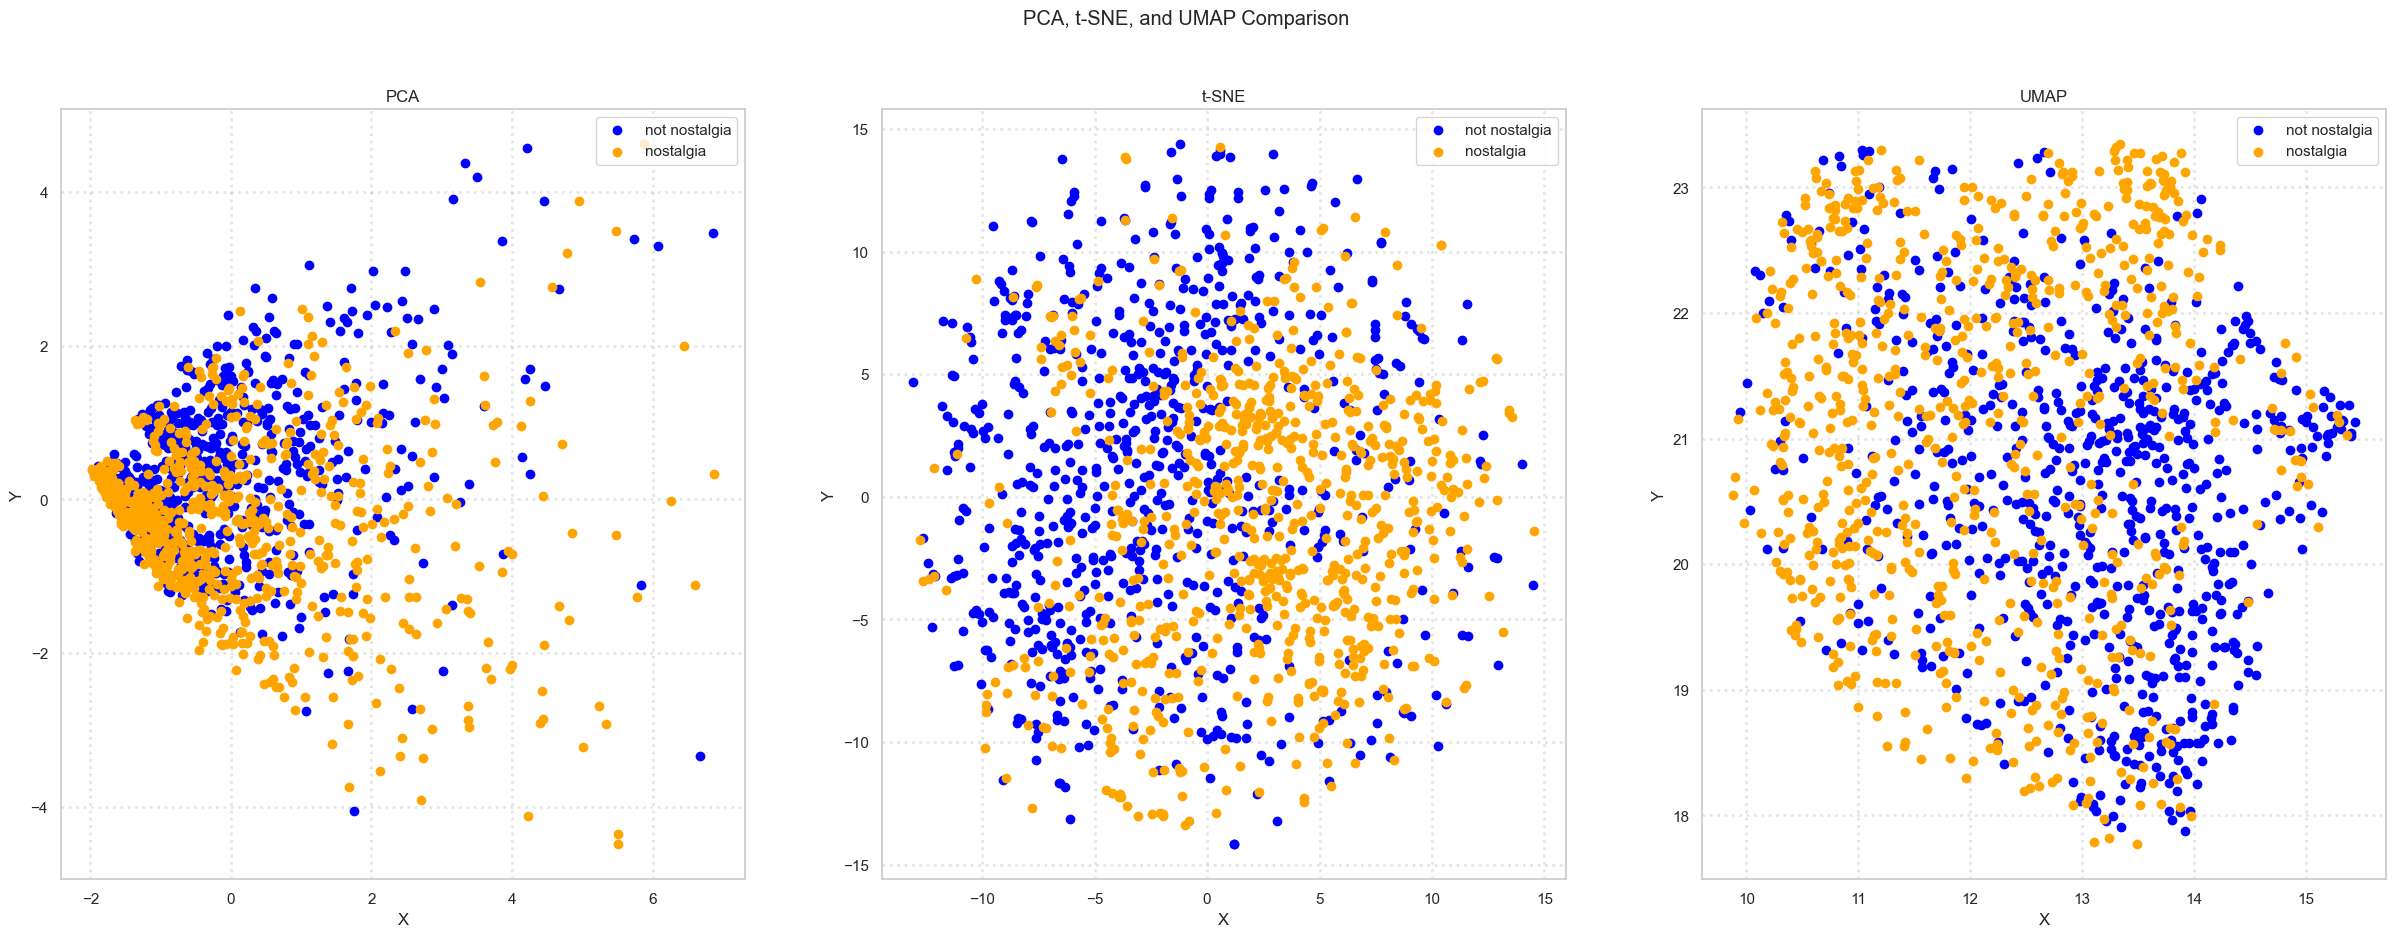

In [824]:
# Plot the results in subplots
col = ['blue','orange']
sentiments = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == sentiment].T[0]
        ys = X_reduced[X['sentiment'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

From the 2D PCA visualization above, we can see a slight "hint of separation in the data"; i.e., they might have some special grouping by sentiment, but it is not immediately clear. In the t-SNE graph we observe a more scattered distribution, but still intermixing with all the categories. And with the UMAP graph, the limits for the data seem pretty well defined, two categories seem to have some points well differentiated from the other classes, but most of them remain intermixed. The algorithms were applied to the raw frequencies and this is considered a very naive approach as some words are not really unique to a document. Only categorizing by word frequency is considered a "bag of words" approach. 

Now let's try in tandem with our pattern augmented data:

In [825]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

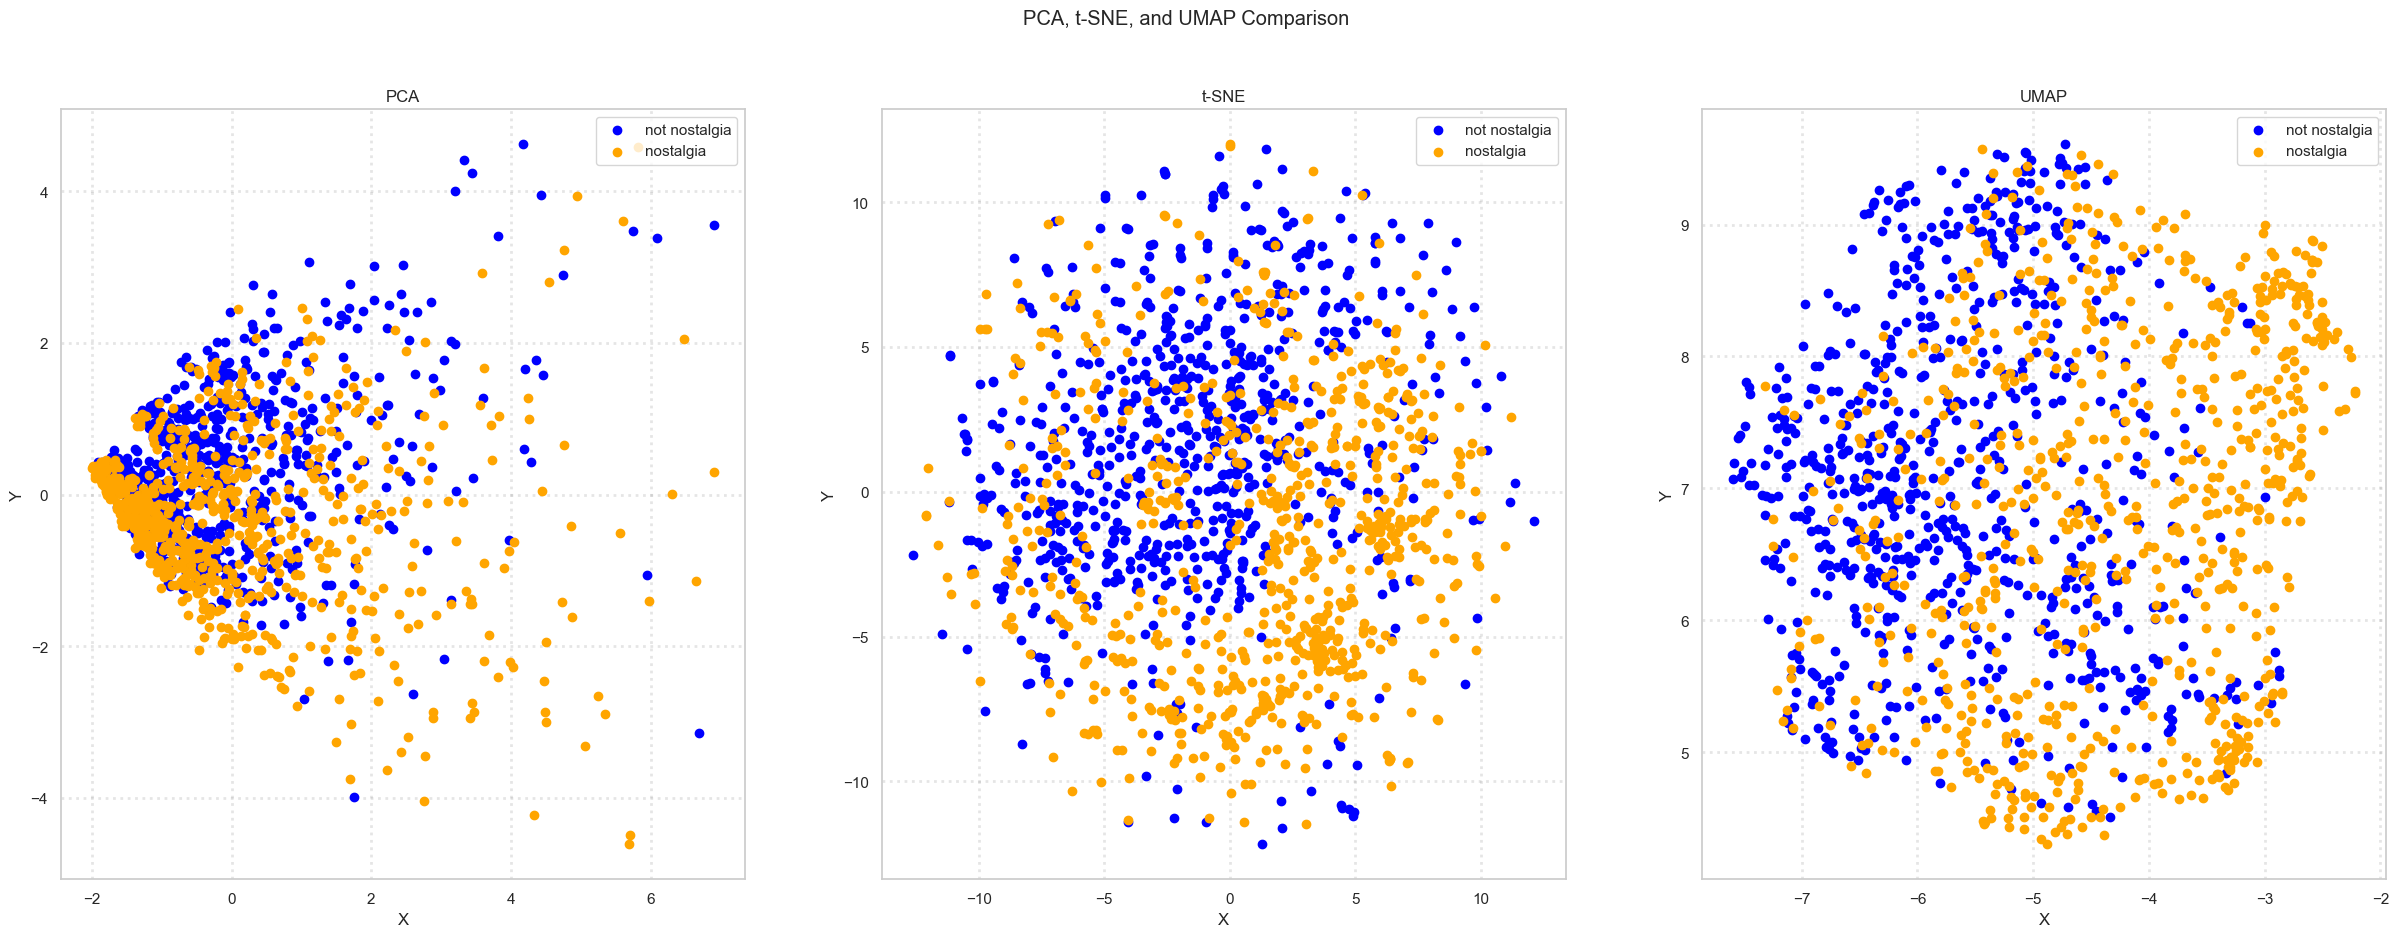

In [826]:
# Plot the results in subplots
col = ['blue', 'orange']
sentiments = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == sentiment].T[0]
        ys = X_reduced[X['sentiment'] == sentiment].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=sentiment)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

Our PCA visualization hasn’t changed much, likely because the original document-term matrix still outweighs the new binary pattern data. 

The t-SNE graph initially appears different, but it’s almost identical, with a slight mirroring along the y-axis. This stability reflects that the binary patterns didn’t significantly alter high-dimensional relationships.

The UMAP visualization shows more change, appearing more compact. UMAP’s complex distance metric likely enhances distinction between points, with the binary patterns reducing category noise for clearer grouping, though some categories remain mixed.

#### 3-D Plot

In [827]:
from mpl_toolkits.mplot3d import Axes3D

In [828]:
# Apply PCA, t-SNE, and UMAP to the data with 3 components
X_pca_aug_3d = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug_3d = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug_3d = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

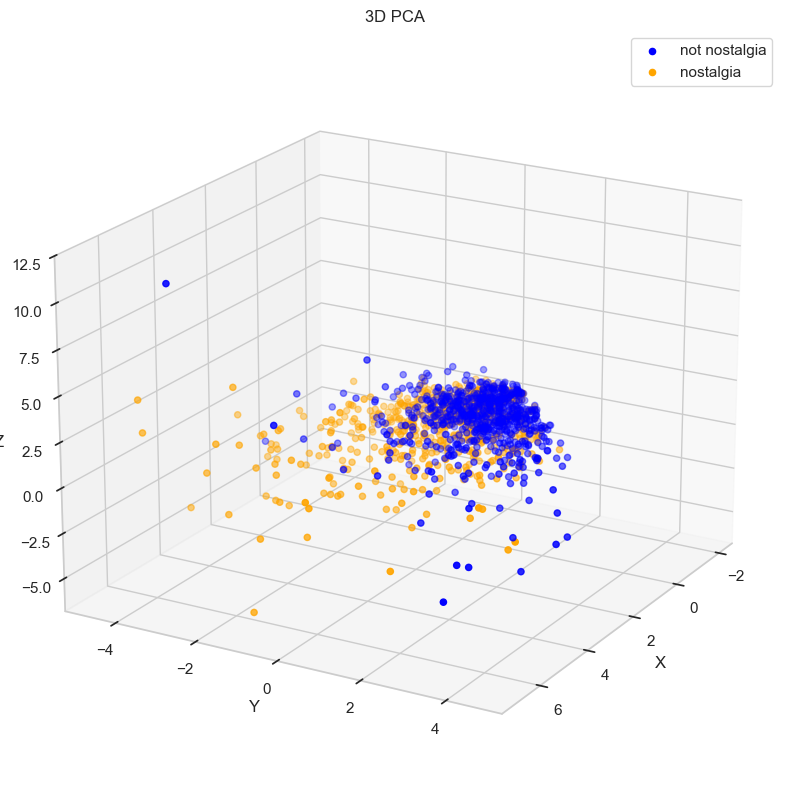

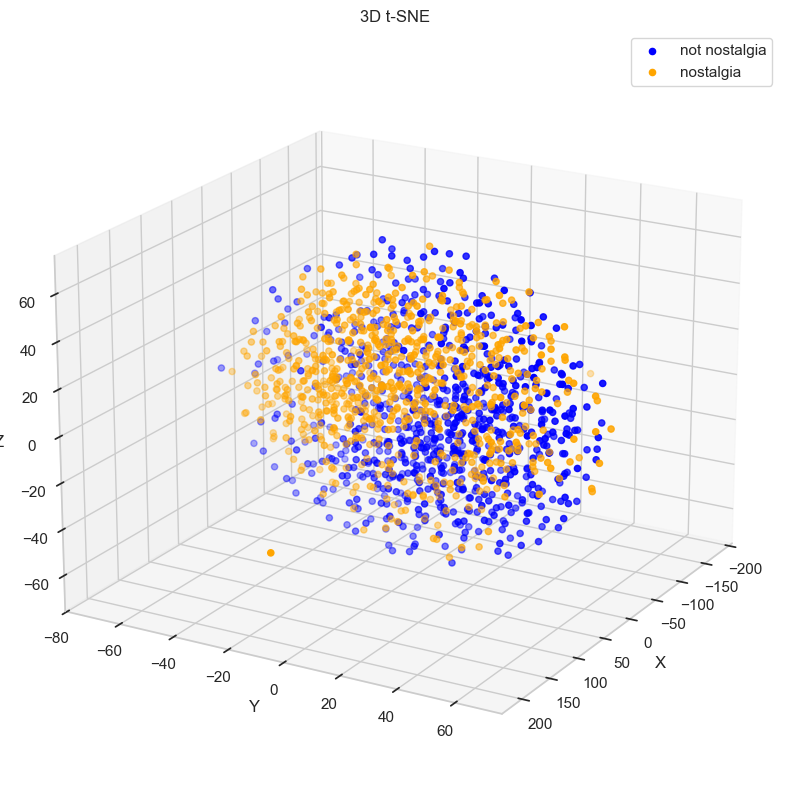

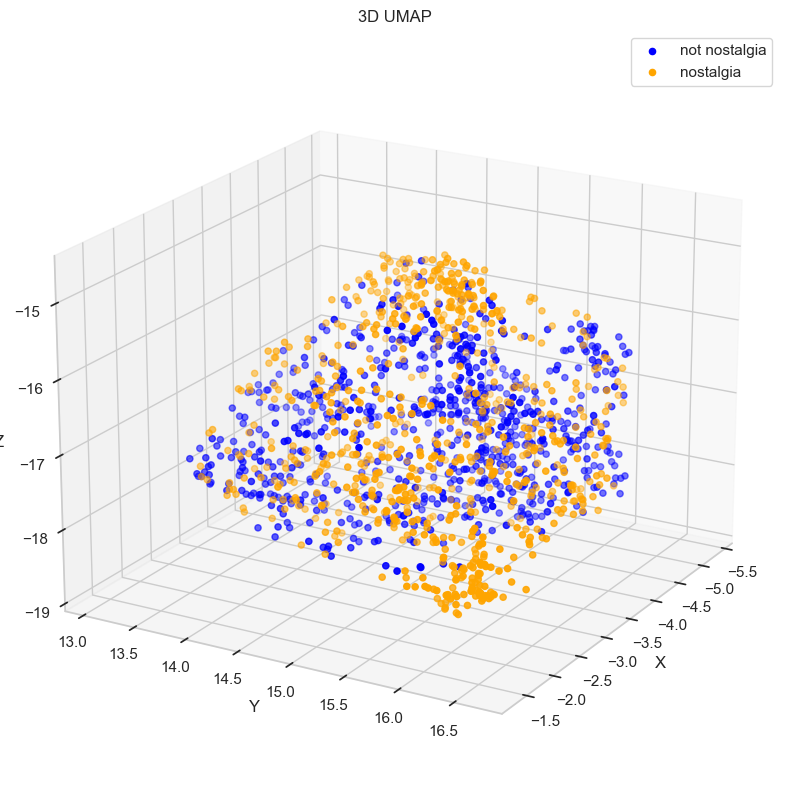

In [829]:
def plot_3d_scatter(X_reduced, title):
    fig = plt.figure(figsize=(15, 10))
    
    # 3D plot
    ax = fig.add_subplot(111, projection='3d')
    
    for c, sentiment in zip(col, sentiments):
        xs = X_reduced[X['sentiment'] == sentiment][:, 0]
        ys = X_reduced[X['sentiment'] == sentiment][:, 1]
        zs = X_reduced[X['sentiment'] == sentiment][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=sentiment)

    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

    # Set different viewing angles
    ax.view_init(elev=20, azim=30) 
    plt.show()

    ax.view_init(elev=30, azim=60)  
    plt.show()

    ax.view_init(elev=40, azim=90)  
    plt.show()

plot_3d_scatter(X_pca_aug_3d, '3D PCA')
plot_3d_scatter(X_tsne_aug_3d, '3D t-SNE')
plot_3d_scatter(X_umap_aug_3d, '3D UMAP')


### 5.6 Discretization and Binarization
Given our current original dataset, we would like to transform one of the attributes, `sentiment_num`, into two binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book. People from the machine learning community also refer to this transformation as one-hot encoding, but as we may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. 

In [830]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [831]:
mlb = preprocessing.LabelBinarizer()

In [832]:
mlb.fit(X.sentiment_num)

LabelBinarizer()

In [833]:
X['bin_sentiment_num'] = mlb.transform(X['sentiment_num']).tolist()

In [834]:
X[0:9]

sentiment  sentiment_num  \
0  not nostalgia              1   
1      nostalgia              0   
2      nostalgia              0   
3  not nostalgia              1   
4      nostalgia              0   
5      nostalgia              0   
6      nostalgia              0   
7      nostalgia              0   
8  not nostalgia              1   

                                             comment  \
0  He was a singer with a golden voice that I lov...   
1  The mist beautiful voice ever I listened to hi...   
2  I have most of Mr. Reeves songs.  Always love ...   
3  30 day leave from 1st tour in Viet Nam to conv...   
4  listening to his songs reminds me of my mum wh...   
5  Every time I heard this song as a child, I use...   
6  My dad loved listening to Jim Reeves, when I w...   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8           Wherever you  are you always in my heart   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_sentiment_num  
0  {Although, have, can, loving., his, now,, a, H...               [1]  
1  {his, a, an, angel, singing, mist, I, voice, T...               [0]  
2  {have, his, people, but, like, Jesus, a, think...               [0]  
3  {Viet, have, can, Lou., this, years, greatest,...               [1]  
4  {to, my, everyday, his, of, who, me, him, remi...               [0]  
5  {reminded, this, child,, heard, Every, a, appr...               [0]  
6  {but, do, a, changes, listening, back, Reeves,...               [0]  
7  {his, he, a, Jim, Reeves, ., with, comes, tune...               [0]  
8        {are, my, Wherever, you, heart, always, in}               [1]

We look the added column in `X` table. New column, called `bin_sentiment`, contains an array of 0 or 1. The `1` is basically to indicate the position of the label or category we binarized.

Attributes with **continuous values** also have strategies to tranform the data; this is usually called **Discretization**.

Now we try to generate the binarization using the `sentiment` column instead. 

In [835]:
X['bin_sentiment'] = mlb.fit_transform(X['sentiment']).tolist()

X[:9]

sentiment  sentiment_num  \
0  not nostalgia              1   
1      nostalgia              0   
2      nostalgia              0   
3  not nostalgia              1   
4      nostalgia              0   
5      nostalgia              0   
6      nostalgia              0   
7      nostalgia              0   
8  not nostalgia              1   

                                             comment  \
0  He was a singer with a golden voice that I lov...   
1  The mist beautiful voice ever I listened to hi...   
2  I have most of Mr. Reeves songs.  Always love ...   
3  30 day leave from 1st tour in Viet Nam to conv...   
4  listening to his songs reminds me of my mum wh...   
5  Every time I heard this song as a child, I use...   
6  My dad loved listening to Jim Reeves, when I w...   
7  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8           Wherever you  are you always in my heart   

                                            unigrams  \
0  [He, was, a, singer, with, a, golden, voice, t...   
1  [The, mist, beautiful, voice, ever, I, listene...   
2  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4  [listening, to, his, songs, reminds, me, of, m...   
5  [Every, time, I, heard, this, song, as, a, chi...   
6  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8   [Wherever, you, are, you, always, in, my, heart]   

                                      tokenized_text bin_sentiment_num  \
0  {Although, have, can, loving., his, now,, a, H...               [1]   
1  {his, a, an, angel, singing, mist, I, voice, T...               [0]   
2  {have, his, people, but, like, Jesus, a, think...               [0]   
3  {Viet, have, can, Lou., this, years, greatest,...               [1]   
4  {to, my, everyday, his, of, who, me, him, remi...               [0]   
5  {reminded, this, child,, heard, Every, a, appr...               [0]   
6  {but, do, a, changes, listening, back, Reeves,...               [0]   
7  {his, he, a, Jim, Reeves, ., with, comes, tune...               [0]   
8        {are, my, Wherever, you, heart, always, in}               [1]   

  bin_sentiment  
0           [1]  
1           [0]  
2           [0]  
3           [1]  
4           [0]  
5           [0]  
6           [0]  
7           [0]  
8           [1]

It works, binarizing the `sentiment` column works in the same way as binarizing the `sentiment_num` column. Both columns contain categorical data so converting them to binary format is straightforward and it worked.

## 6. Data Exploration

In [836]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [837]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['i guess most of us leave it too late before we tell someone just how much we really love them']
['my name is thomas but know by tommy and my wifes name is laura and i always sing this to her']


In [838]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [839]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.032174
Cosine Similarity using count bw 1 and 3: 0.027864
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\Samuel Sukatja\AppData\Local\Temp\ipykernel_4480\452772485.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Samuel Sukatja\AppData\Local\Temp\ipykernel_4480\452772485.py:14: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Samuel Sukatja\AppData\Local\Temp\ipykernel_4480\452772485.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Samuel Sukatja\AppData\Local\Temp\ipykernel_4480\452772485.py:17: DeprecationWarning:

Conversion

As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0.

We can assume that we have the more common features in the documents 1 and 2 than in documents 1 and 3. This reflects indeed in a higher similarity than that of sentences 1 and 2.

## 7. Data Classification
Data classification is key in finalizing the data mining process, organizing data into categories for predictions and decision-making. For text mining, it’s used to label documents, like sorting news articles into sports, politics, or tech.

One effective method is Multinomial Naive Bayes, which calculates the probability of a document’s category based on word frequency, assuming word independence. This classifier is especially suited for text data represented in term frequencies, as in our document-term matrix. It also supports binary pattern matrices, treating binary values as count-like features.

We’ll implement Multinomial Naive Bayes using a 70/30 train-test split and compare results with and without pattern data.

In [840]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(X[['sentiment_num', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment_num'], test_size=0.3, random_state=42)

In [841]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8222    0.9528    0.8827       233
not nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [842]:
#Model with the augmented data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
sentiment_mapping = dict(X[['sentiment_num', 'sentiment']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment_num'], test_size=0.3, random_state=42)

In [843]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.88

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8538    0.9270    0.8889       233
not nostalgia     0.9137    0.8295    0.8696       217

     accuracy                         0.8800       450
    macro avg     0.8837    0.8783    0.8792       450
 weighted avg     0.8827    0.8800    0.8796       450



We tested two versions of a model to see how well they could identify "nostalgia" versus "not nostalgia" in YouTube comments. The first model (the "baseline") just used word counts, while the second model (the "augmented") added special patterns specific to each type of sentiment.

1. **Accuracy**: The augmented model scored 87.5% accuracy, about 1.5% better than the baseline. 

2. **Precision**: For the "nostalgia" comments, precision increased from 83.14% to 86.59%, meaning it did a better job of finding the true "nostalgia" comments without mixing in too many wrong ones. "Not nostalgia" precision stayed high and even improved a little.

3. **Recall**: The augmented model got better at catching "not nostalgia" comments, improving recall from 79.44% to 84.58%. This means it recognized more of these comments accurately.

4. **F1-Score**: Both models scored well, but the augmented model got even better scores, which means it balanced accuracy and recall more effectively across both categories.

Adding specific patterns helped the model tell the difference between "nostalgia" and "not nostalgia." So, the augmented model was better at correctly identifying each type of comment. 

# 3. New Tasks

## 3.1 New Data Visualization

### 3.1.1 World Cloud
Here we can try to use Word clouds, they are a visually engaging way to represent the most frequent words in a dataset.

In [844]:
from wordcloud import WordCloud

##### Using the original comment from X

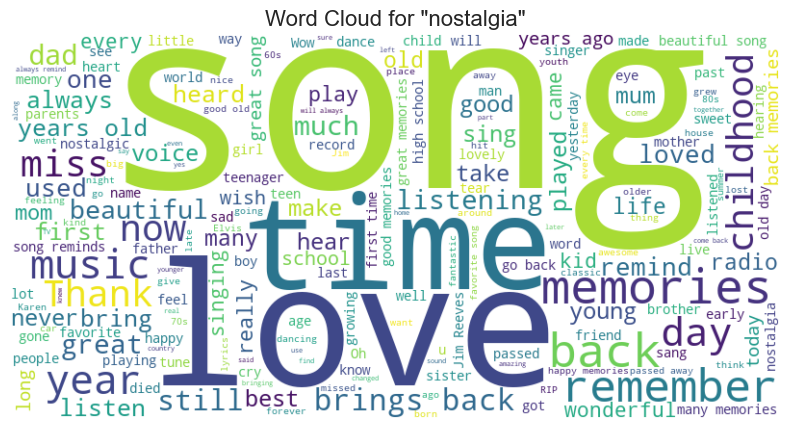

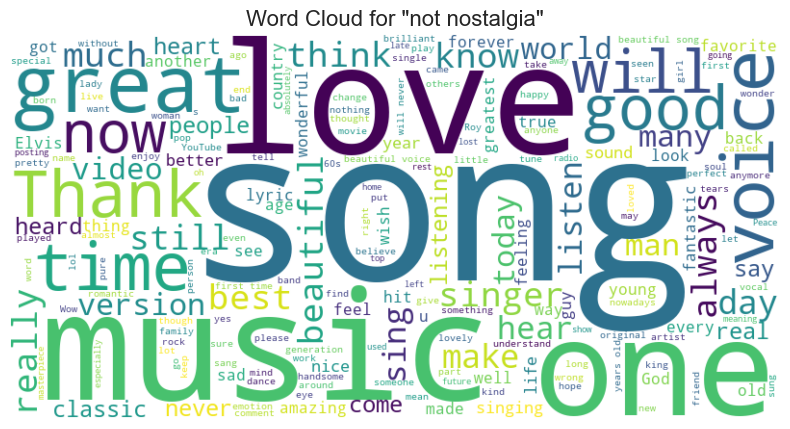

In [845]:
# Function to create a word cloud for a given sentiment
# Using the original comment from X
def create_word_cloud(sentiment):
    # Filter the DataFrame for the selected sentiment
    filtered_comments = X[X['sentiment'] == sentiment]['comment']
    
    # Join all comments into a single string
    text = ' '.join(filtered_comments)
    
    # Create the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title(f'Word Cloud for "{sentiment}"', fontsize=16)
    plt.show()

# Create word clouds for both sentiments
create_word_cloud('nostalgia')
create_word_cloud('not nostalgia')


##### Using the term_document_dfs (filtered top5% bottom 1%)

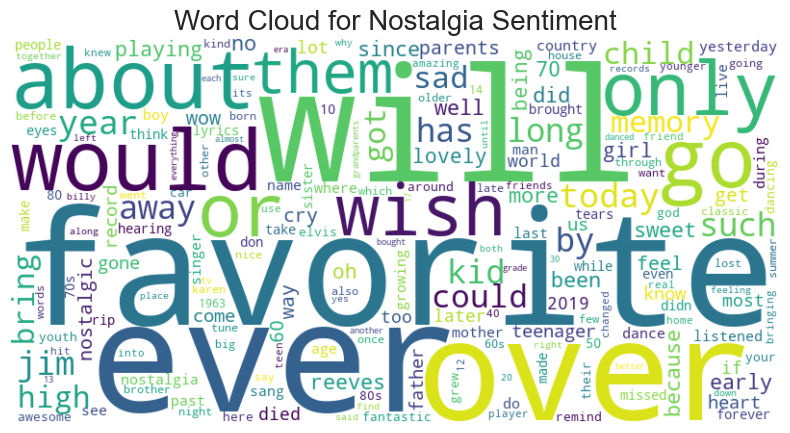

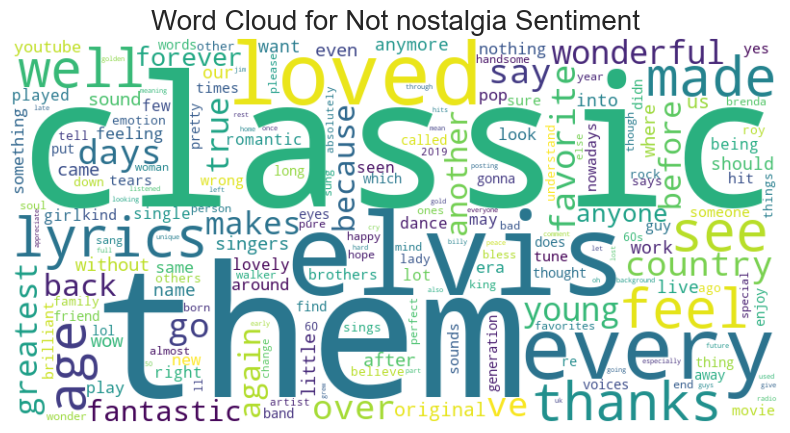

In [846]:
# Using the term_document_dfs (filtered top5% bottom 1%)
def generate_word_cloud(sentiment, term_doc_dict):
    # Get the DataFrame for the specified sentiment
    df = term_doc_dict[sentiment]
    
    # Sum the counts of each term across all documents
    freq_dict = df.sum(axis=0).to_dict()
    
    # Generate word cloud from the frequency dictionary
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment.capitalize()} Sentiment', fontsize = 20)
    plt.show()

# Create word clouds for each sentiment in your dataset

generate_word_cloud("nostalgia", term_document_dfs)
generate_word_cloud("not nostalgia", term_document_dfs)


1. **Nostalgia**:
The "nostalgia" comments show a different side. Words like "remember", "memories", "back", "favorite," "will," "ever," and "about" reveal that these comments are filled with cherished memories. The word "memory" comes up a lot, along with emotional words like "bring," "sad," and "wish," which shows that people are really longing for the past. We also see references to "child," "kid," and "parents," which suggests that these comments are all about childhood memories and family connections.

2. **Not Nostalgia**:
On the other hand, In the "not nostalgia" comments, we see a lot of common words that tell us what people are talking about. Words like "got," "them," "elvis," and "every" pop up a lot, which shows that people are sharing their thoughts about certain songs or artists, especially Elvis Presley. There are also words like "feel," "made," and "thanks" that suggest people are reflecting on their experiences and feeling grateful for the music. Even though these comments are labeled as "not nostalgia," words like "favorite," "days," and "young" hint that they’re still thinking about good times, just not in a nostalgic way.

Interestingly both nostalgia and not nostalgia display "song" as the biggest word, meaning that most of the comments are about songs

### 3.1 Boxplot of Comment Length by Sentiment

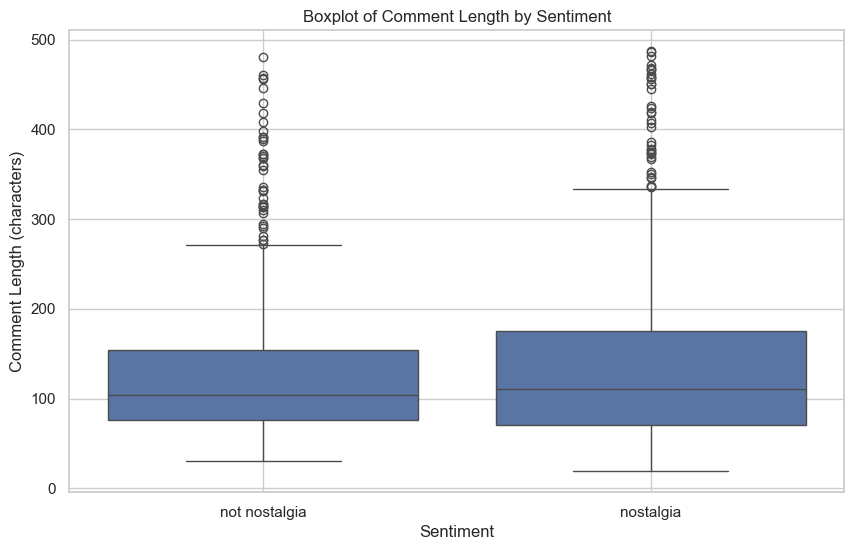

In [847]:
# Create a new column for comment length
X['comment_length'] = X['comment'].str.len()

# Prepare the data for boxplot
X_melted = X[['comment_length', 'sentiment']]  # Ensure you have a sentiment column

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='sentiment', y='comment_length', data=X_melted)
plt.title('Boxplot of Comment Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Comment Length (characters)')
plt.grid(True)
plt.show()


#### Obervation: 
The boxplot comparing comment lengths for "nostalgia" and "not nostalgia" shows some interesting differences. First, the median line inside the box for nostalgia is higher, meaning that people tend to write longer comments when they talk about nostalgic topics. The box for nostalgia is also wider, which indicates that there’s more variety in comment lengths, with some really long comments that might show how much these topics matter to people. Plus, the upper whisker for nostalgia reaches about 330, while the upper whisker for not nostalgia is only around 270. This means that comments about nostalgia can be a lot longer. Overall, it looks like nostalgic topics really get people to express their feelings and thoughts more.

## 3.2-3 TF-IDF - Naive Bayes

I have already implement Naive Bayes with the frequency of the words in the previous part, now lets focus building the classifier using TF-IDF. Here we are going to use the **Bernoulli Naive Bayes**. 

**Bernoulli Naive Bayes** is a variant of the Naive Bayes classifier that is particularly suited for binary/boolean features. Unlike **Multinomial Naive Bayes**, which works well with count data (e.g., word frequencies), **BernoulliNB** operates on binary features, making it ideal for cases where the presence or absence of a feature is more relevant than its frequency.

#### Word Frequency - Multionmial NB

In [848]:
#Model with only the word-frequency using tdm_df

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8688888888888889

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8222    0.9528    0.8827       233
not nostalgia     0.9389    0.7788    0.8514       217

     accuracy                         0.8689       450
    macro avg     0.8806    0.8658    0.8670       450
 weighted avg     0.8785    0.8689    0.8676       450



In [849]:
#Model with only the word-frequency using augmented_df

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment'], test_size=0.3, random_state=42)
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.88

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8538    0.9270    0.8889       233
not nostalgia     0.9137    0.8295    0.8696       217

     accuracy                         0.8800       450
    macro avg     0.8837    0.8783    0.8792       450
 weighted avg     0.8827    0.8800    0.8796       450



#### TF-IDF Bernoulii

In [850]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, GaussianNB

In [851]:
comments = X['comment'].tolist()

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(X['comment'])

# Convert to a DataFrame for easier handling
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [852]:
print("TF-IDF Matrix: \n",tfidf_matrix, "\n")
print("TF-IDF DF: \n", tfidf_df)

TF-IDF Matrix: 
   (0, 2799)	0.1743599378602194
  (0, 1379)	0.2319408494414351
  (0, 3315)	0.13805202786862447
  (0, 1913)	0.11015574321101516
  (0, 1511)	0.15546129353266006
  (0, 3123)	0.2457353217365565
  (0, 1421)	0.12439425203695548
  (0, 1176)	0.25952501067456446
  (0, 207)	0.1916836523642169
  (0, 15)	0.30324487184292076
  (0, 853)	0.14796379119586062
  (0, 2800)	0.20435668820830571
  (0, 3319)	0.30324487184292076
  (0, 1722)	0.1904956377954463
  (0, 2509)	0.20117134602424108
  (0, 1199)	0.1904956377954463
  (0, 2526)	0.27566071060979136
  (0, 1060)	0.2667805941349442
  (0, 1920)	0.2319408494414351
  (0, 3089)	0.15497891753421916
  (0, 1903)	0.25952501067456446
  (0, 1849)	0.16595077993068125
  (1, 3315)	0.4241559188297989
  (1, 1913)	0.16922319504249186
  (1, 2065)	0.46585011909191687
  :	:
  (1497, 699)	0.24220757486775057
  (1497, 1616)	0.24220757486775057
  (1497, 1351)	0.25226669443106553
  (1497, 320)	0.25226669443106553
  (1497, 1063)	0.26644422717216487
  (1497, 2386)	0.

In [853]:
# Split your dataset 
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, X['sentiment'], test_size=0.3, random_state=42)

# Initialize and Train the Classifier:
model = BernoulliNB()
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))


Accuracy: 0.8733333333333333

Classification Report:
                precision    recall  f1-score   support

    nostalgia     0.8438    0.9270    0.8834       233
not nostalgia     0.9124    0.8157    0.8613       217

     accuracy                         0.8733       450
    macro avg     0.8781    0.8714    0.8724       450
 weighted avg     0.8768    0.8733    0.8728       450



#### Comparative Analysis

- **Accuracy**: The word frequency model using `augmented_df` achieved the highest accuracy at 0.88, outperforming both the TF-IDF model (0.8733) and the word frequency model using `tdm_df` (0.87).
  
- **Precision**: 
  - For the "nostalgia" class, the `augmented_df` model (0.8538) showed the best precision compared to the TF-IDF model (0.8438) and the `tdm_df` model (0.8222).
  - In the "not nostalgia" category, the `tdm_df` model (0.9389) outperform the `augmented_df` model (0.9137) and the TF-IDF model (0.9124). 

- **Recall**: The `tdm_df` model achieved the highest recall for the "nostalgia" class (0.9528), while the `augmented_df` model also performed well (0.9270). For the "not nostalgia" class, the recall was highest for the `augmented_df` model (0.8295), compared to the TF-IDF model (0.8157).

- **F1-Score**: The `augmented_df` model shows the best F1-scores overall for both classes. The highest F1-score for the "nostalgia" class was 0.8889 (augmented_df), and for the "not nostalgia" class, it was 0.8696 (augmented_df).


#### Conclusion
In conclusion, the analysis shows that the word frequency model, especially when using augmented data, performs a bit better than the TF-IDF model. It has higher accuracy, precision, recall, and F1-score. This means that both models are good for figuring out sentiment in texts. However,we see that when not using augmented data (tdm_df) and using MultinomialNB, the TF-IDF model using BernoulliNB is better

# 4. Inefficient Data Prerocessing

### 1. **Sampling**
   - **Improvement**: Instead of random sampling, consider stratified sampling to maintain the original distribution of nostalgic vs. non-nostalgic comments. This would prevent class imbalance in the training and test sets which is important for models that may otherwise perform poorly on less-represented classes.
   - **Why?**: Stratified sampling ensures that each subset has a similar distribution, so it is important for classification accuracy, especially with potentially imbalanced labels.
![stratified](https://www.scribbr.com/wp-content/uploads/2020/09/stratified-sample-7-2048x863.png)

### 2. **Feature Creation (Unigrams)**
   - **Improvement**: While unigrams (individual words) are useful, this dataset might benefit from including bigrams or even trigrams to capture context more effectively. Additionally, focusing on term frequency-inverse document frequency (TF-IDF) rather than raw counts can make features more informative by down-weighting common words that appear frequently across all comments.
   - **Why?**: N-grams allow the capture of phrase-level patterns (e.g., “good old days”) that unigrams miss, which may be especially indicative of nostalgic language. TF-IDF also helps balance feature importance across common and rare terms, showing more unique terms in the comments.
   - <img src="https://cdn.botpenguin.com/assets/website/N_Gram_feb7947286.png" alt="N-grams" width="300" height="300">


### 3. **Attribute Transformation / Aggregation**
   - **Improvement**: While transforming the word distribution into a simple scale is a reasonable approach, a more effective transformation is to try applying normalization techniques (e.g., min-max scaling or standardization) to handle word frequency variations. Additionally, further aggregation (e.g., sentiment scores, length of comments) could also make new useful features.
   - **Why?**: Normalizing the word distribution helps in reducing skew, especially with sparse data, improving the performance of models. Aggregating additional features like sentiment scores or comment length could further help differentiate nostalgic and non-nostalgic comments.

